# Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import missingno as msno

from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

import joblib
import shap

In [5]:
df = pd.read_csv('C:/Users/Rocelle Nathalie Ong/Documents/MegaGuidedProjects/RTA Project/Dataset/RTA Dataset.csv')

**Display the dataset**

In [6]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


**Identify the summary of the dataset**

In [7]:
df.shape

(12316, 32)

The dataset has 12316 rows and 32 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

The dataset has the following details: 
1. Memory usage: 3.0+ MB
2. Number of columns: 32
3. Number of rows: 12316
4. Number of columns in int64 dataype: 2
5. Number of columns in object datatype: 30
6. Number of columns with missing values: 16

**Identify missing values** <br>
The following columns contain missing values

In [9]:
df.columns[df.isnull().sum().sort_values() == 0]

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type'],
      dtype='object')

**Identify Duplicates**

In [10]:
df.duplicated().sum()

0

All rows have unique values

**Check the unique values of each columns**

In [11]:
for col in df:
    print("Unique Values for: "+col)
    print(df[col].unique())

Unique Values for: Time
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
Unique Values for: Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Unique Values for: Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Unique Values for: Sex_of_driver
['Male' 'Female' 'Unknown']
Unique Values for: Educational_level
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Unique Values for: Vehicle_driver_relation
['Employee' 'Unknown' 'Owner' nan 'Other']
Unique Values for: Driving_experience
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
Unique Values for: Type_of_vehicle
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle'

**Display Statistical description of the dataset** <br>

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [13]:
df.describe(include="object").T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


**Display Numeric Variables**

In [14]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True

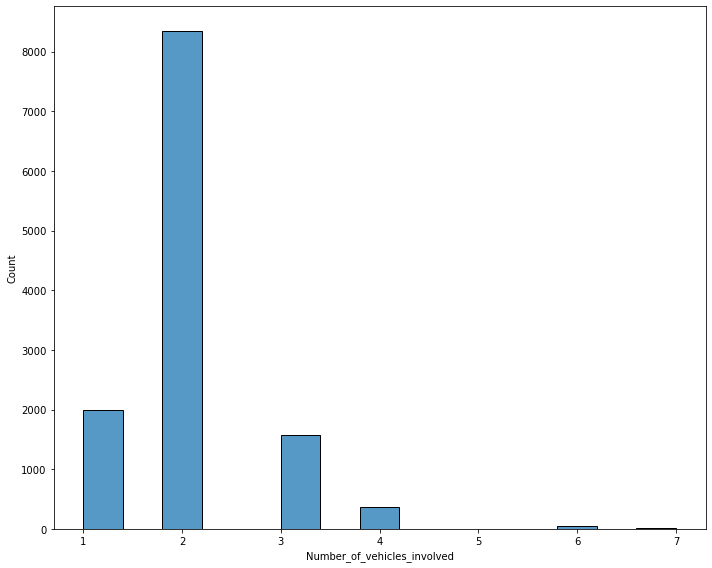

In [15]:
sns.histplot(df['Number_of_vehicles_involved'])
plt.show()

As shown in the figure above, two vehicles are most involved in every accident. There tendency where the most of the accidents happen are due to collision of two vehicles.

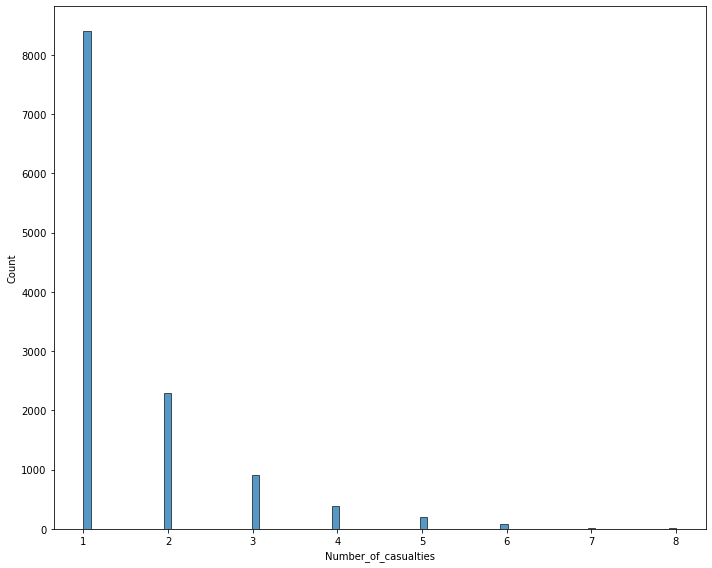

In [16]:
sns.histplot(df['Number_of_casualties'])
plt.show()

One casualty is most common number of person involved in every accident. In the next graph, we will see who are these people affected in an accident.

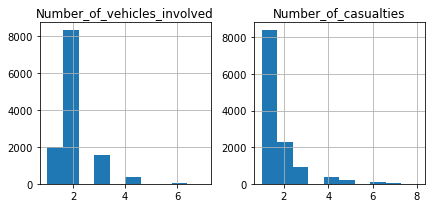

In [17]:
df.hist(layout=(1,6), figsize=(18,3))
plt.show()

**Display Categorical variables**

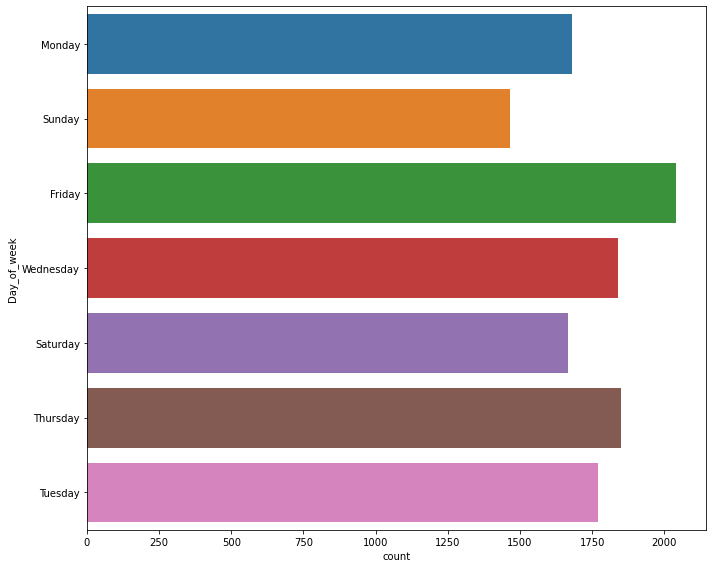

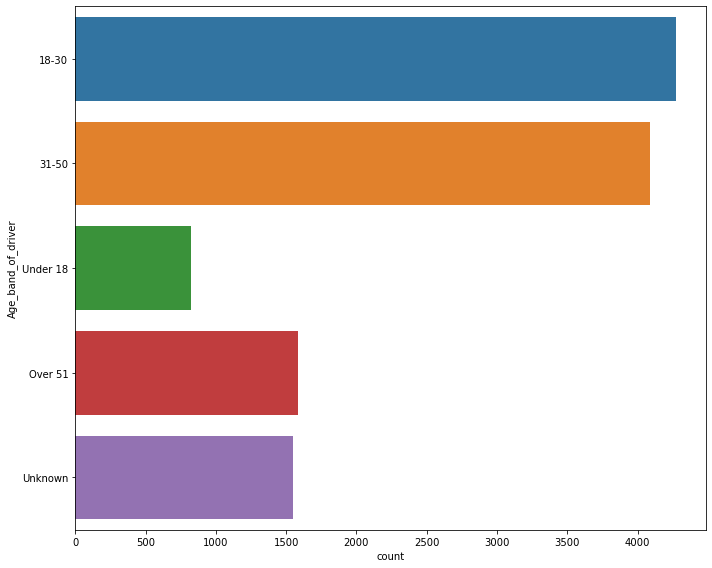

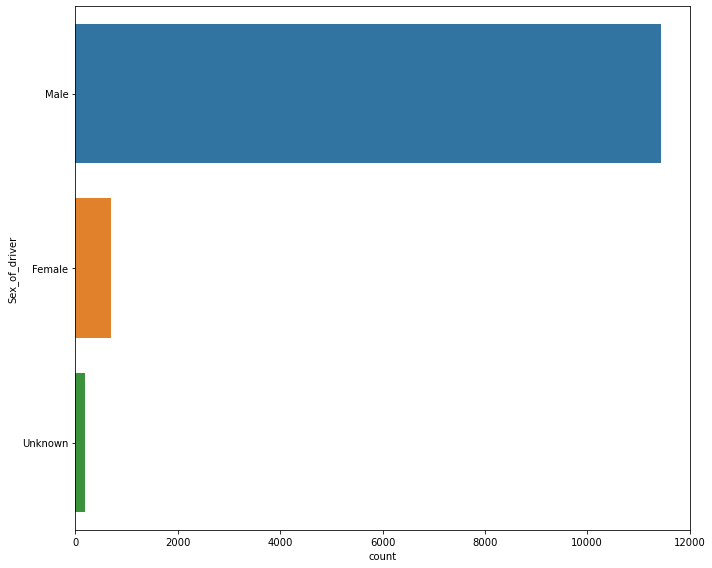

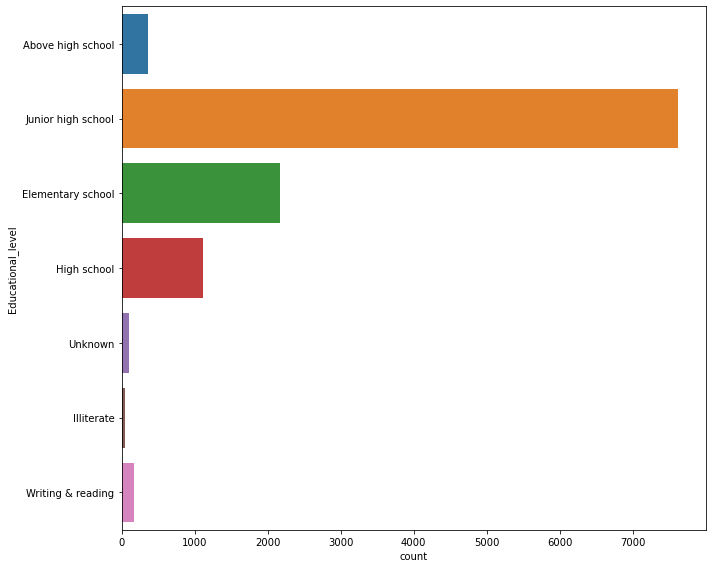

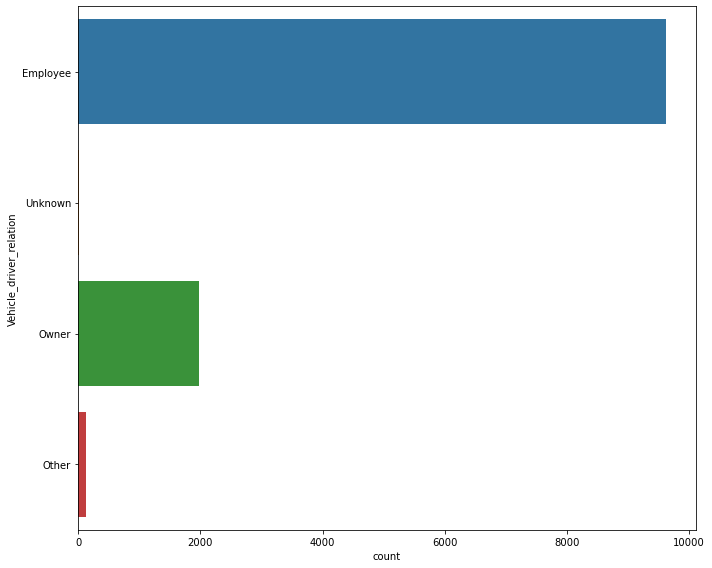

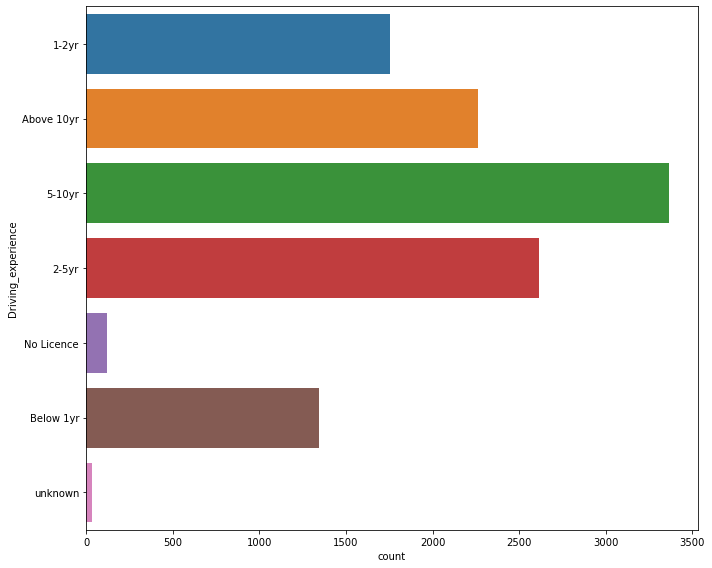

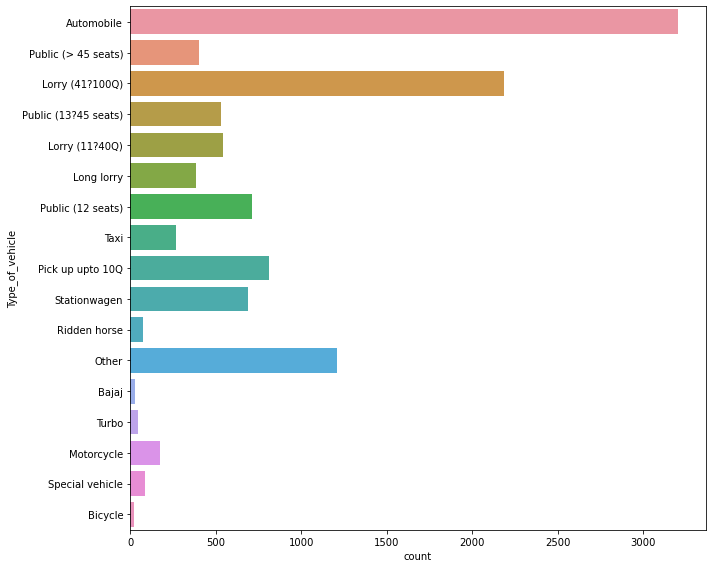

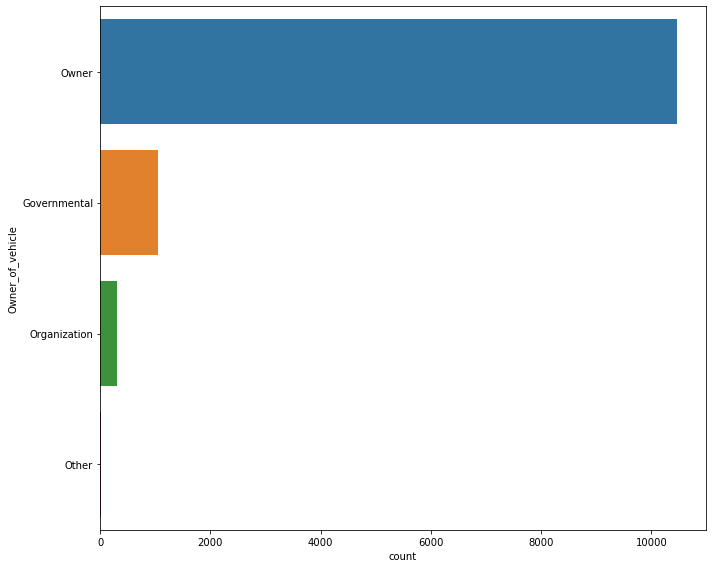

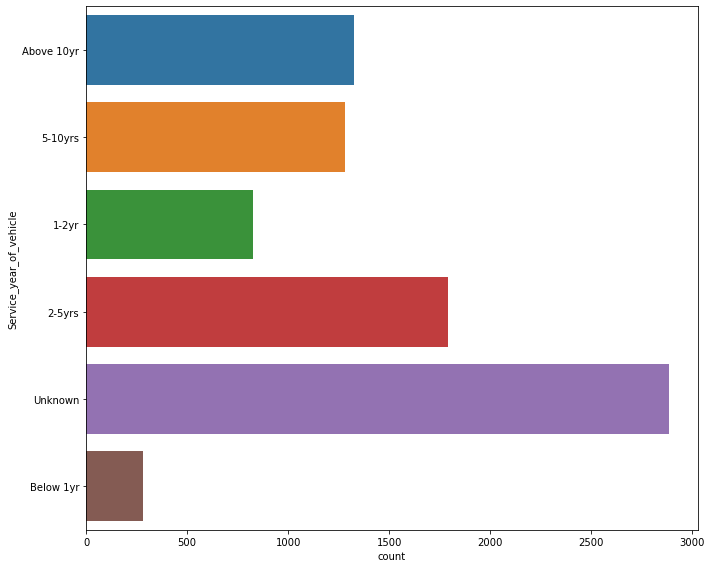

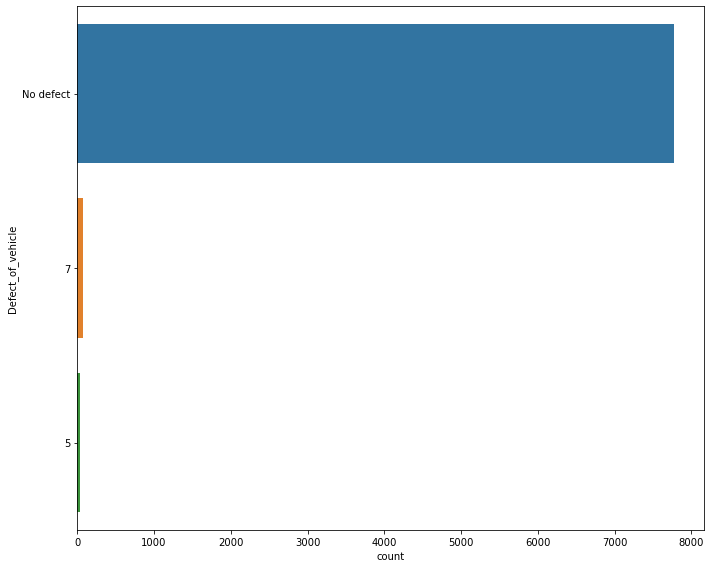

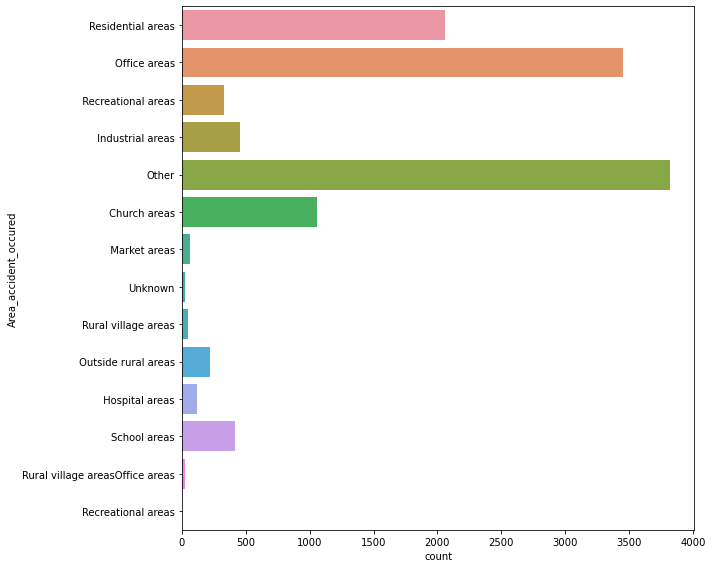

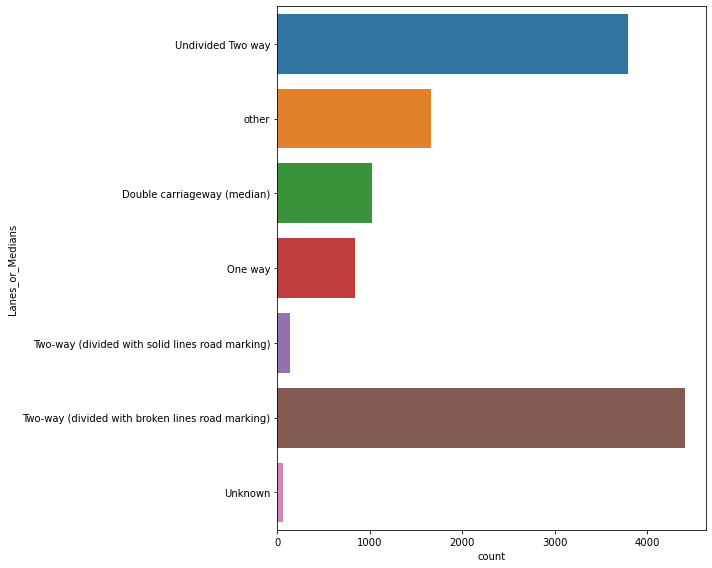

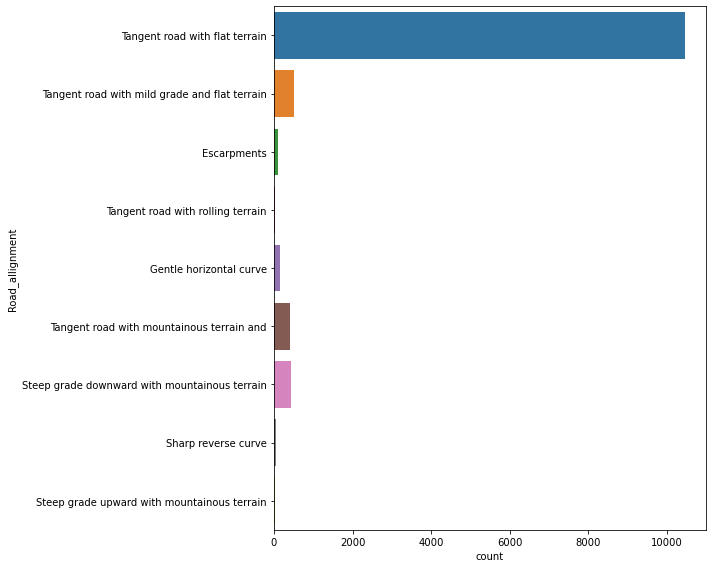

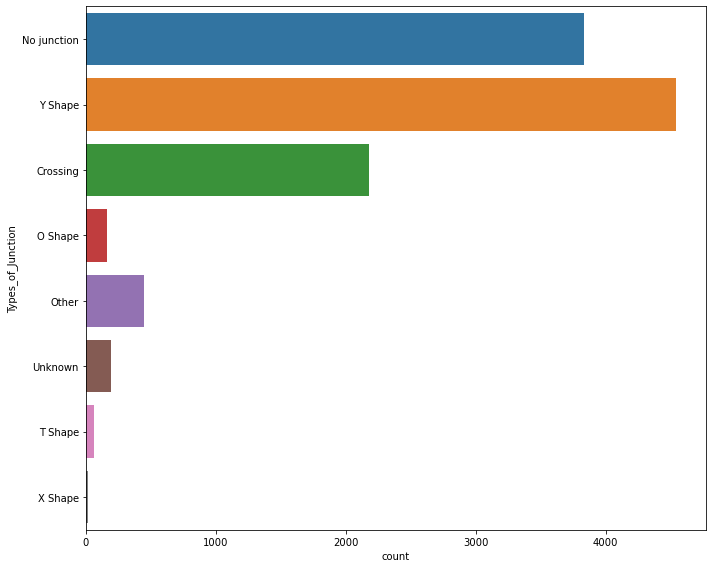

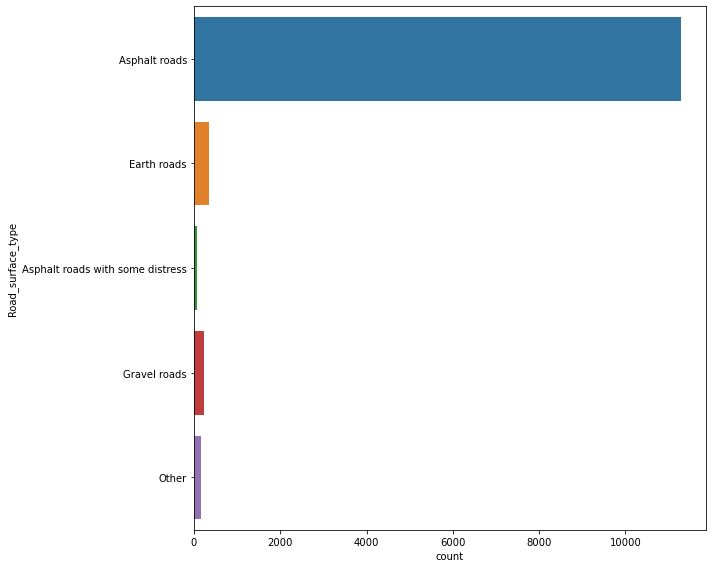

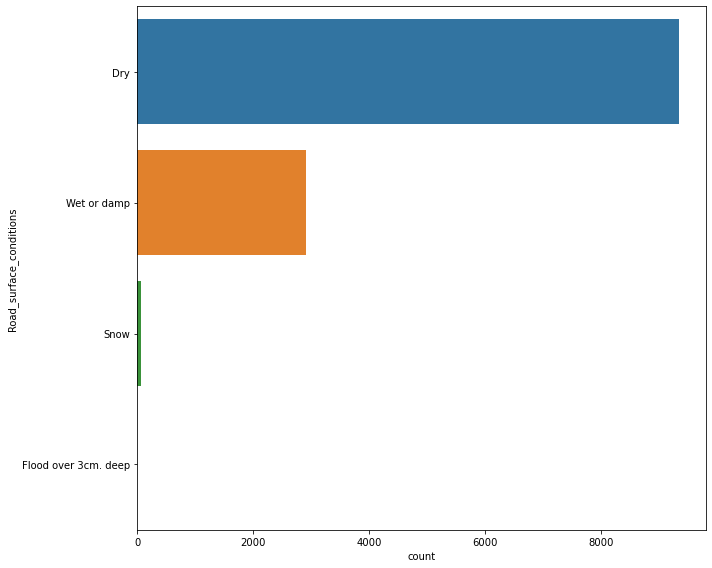

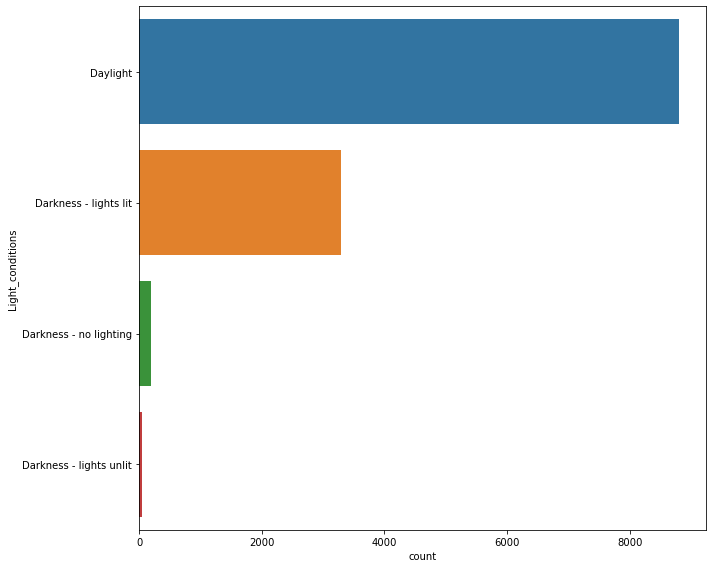

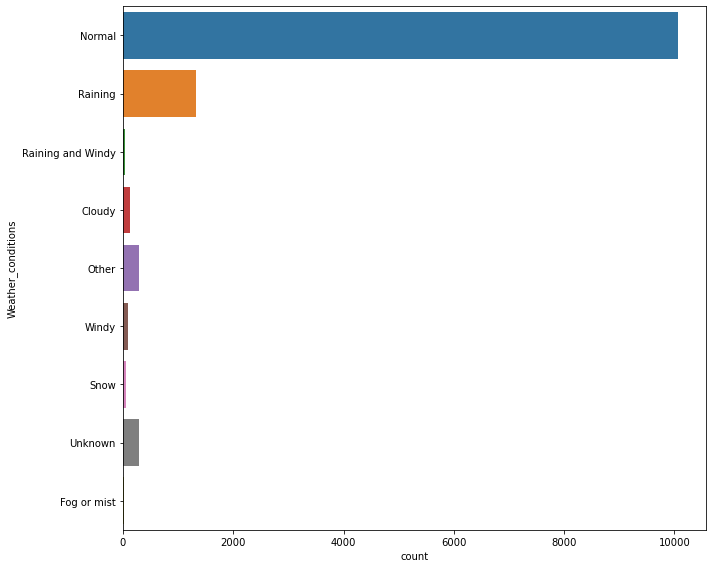

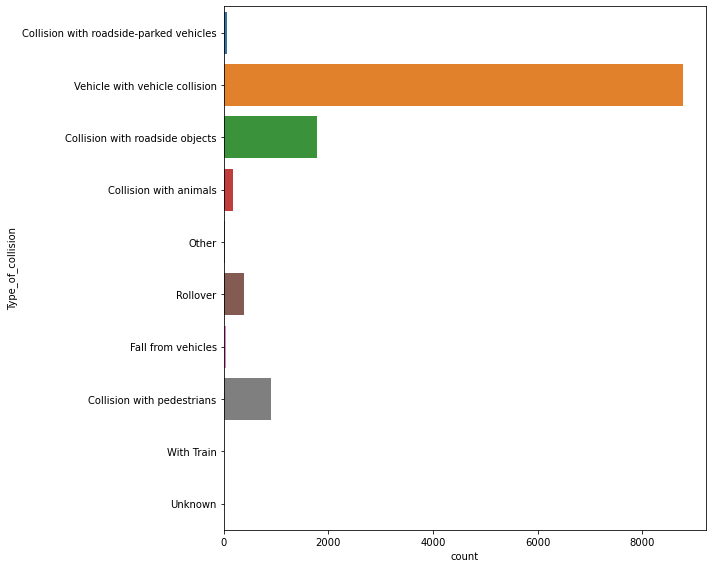

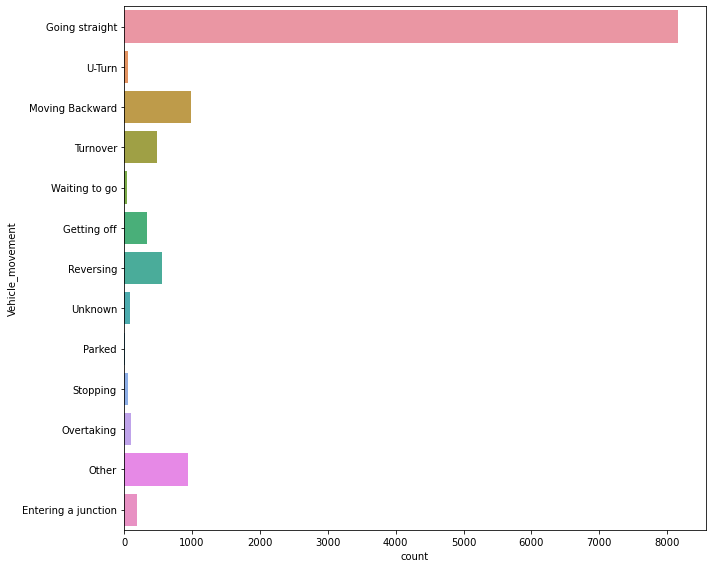

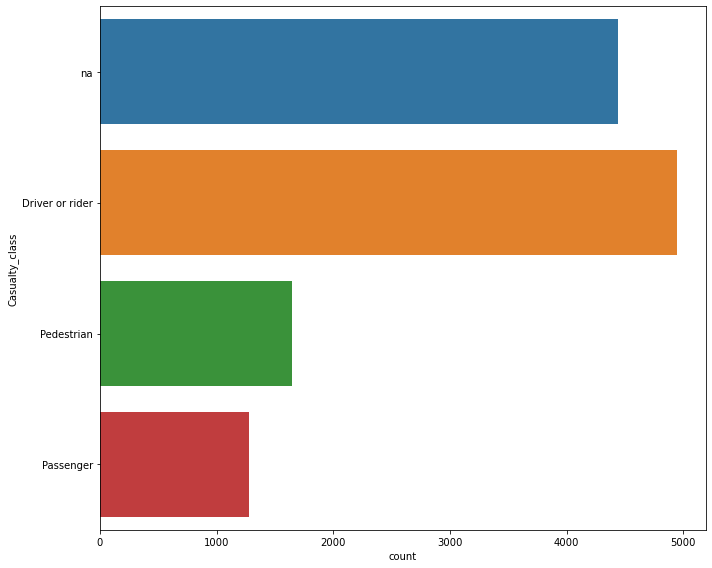

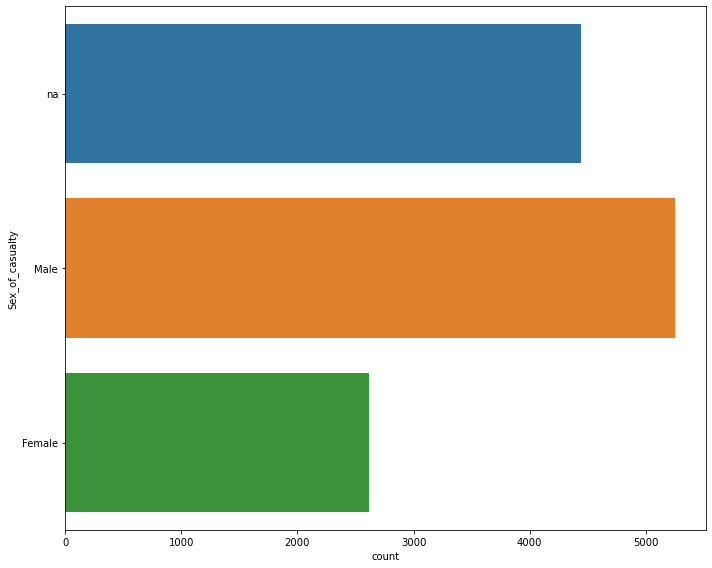

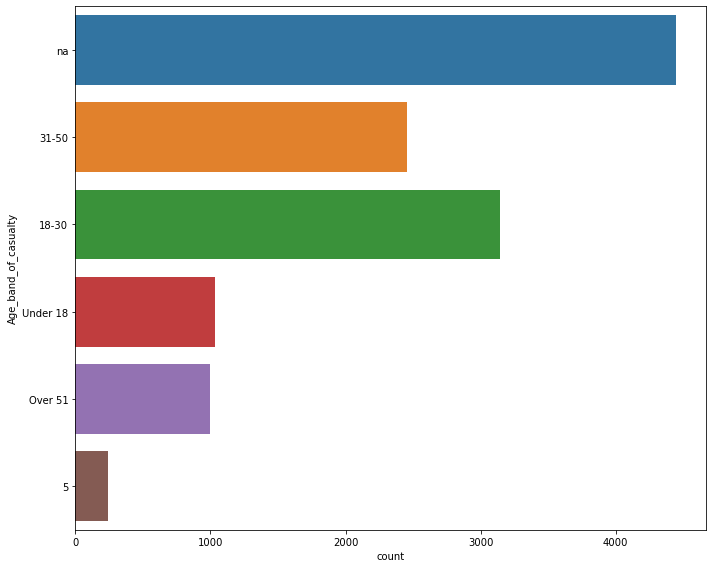

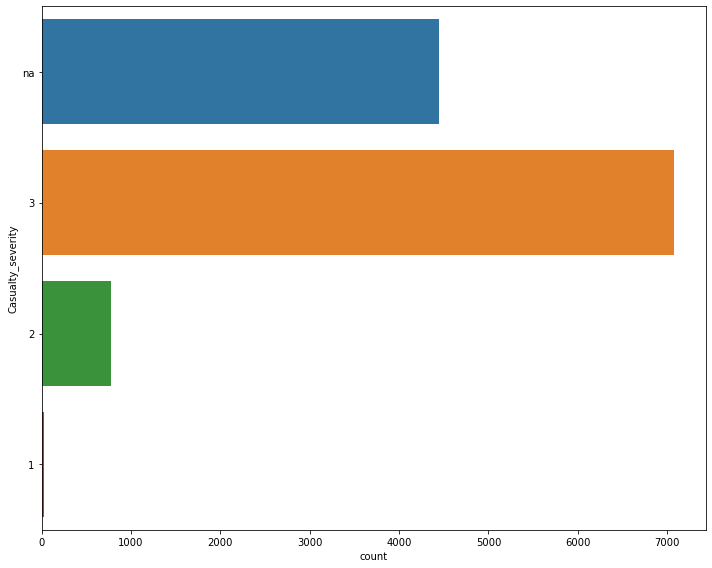

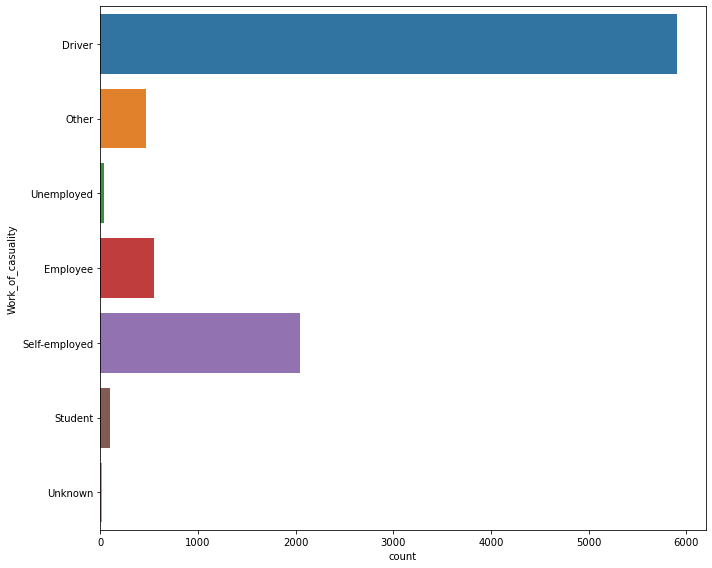

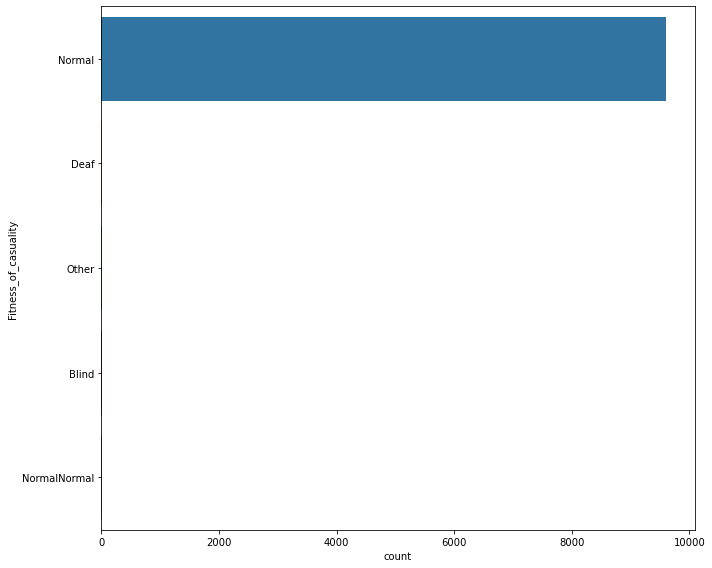

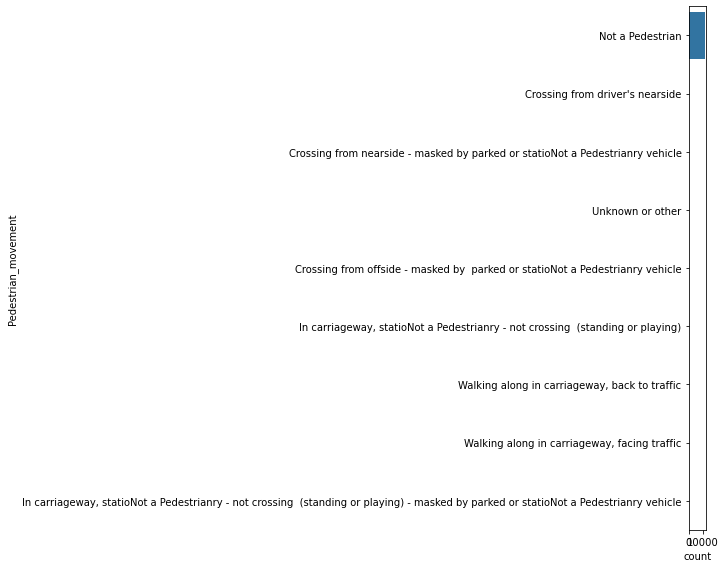

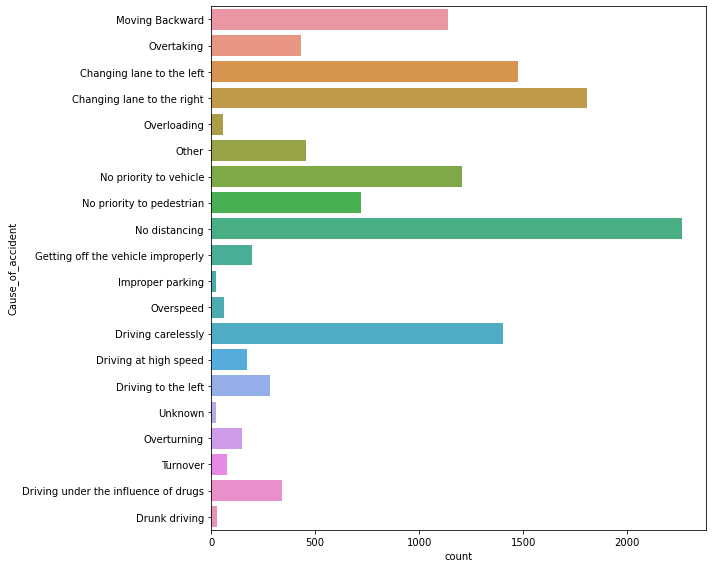

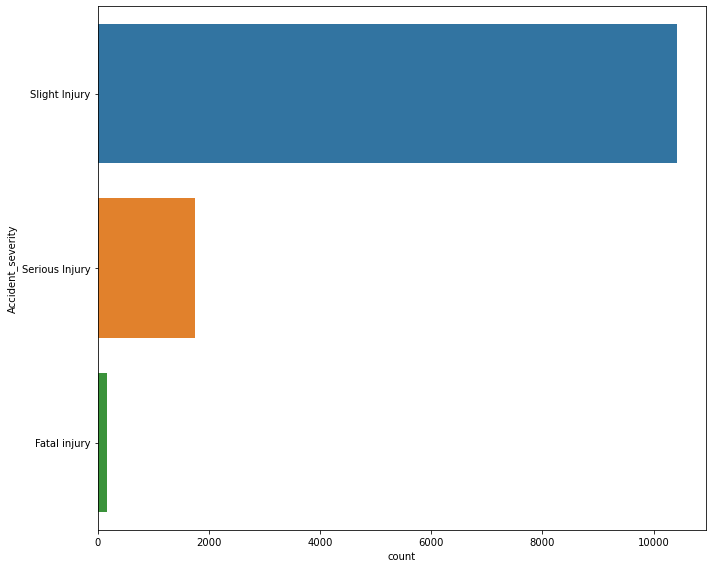

In [18]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.show()

The following are observed in the graph above:
1. Day_of_week: Friday has the highest number of accident record in the data
2. Age_band_of_driver: Ages 18 to 30 is the common age range of the driver involved in an accident
3. Sex_of_driver: Most drivers involved in the accident are male.
4. Educational_Level: The common educational level attained by the drivers is Junior High School
5. Vehicle_driver_relation: Most of the driver are employee of the vehicle owner
6. Driving_experience: Most of the drivers have 5 to 10 years driving experience
7. Type_of_vehicle: Automobile is the most type of vehicle that was involved in an accident
8. Defect_vehicle: Most of the vehicles involved in an accident does not have a defect
9. Lanes: Two-way with broken lines road marking are the lanes that has the most encountered accident
10. Road_allignment: Most accidents occur when the allignment of the road is tanget road with mild grade and flat terrain
11. Types of junction: Most accidents occur at Y-junction
12. Road_surface_types: Most accidents occur at Asphalt roads
13. Light_conditions: Most accidents happen during daylight
14. Type_of_Collision: Collision between two vehicles has the most accidents occur

**Inspect the Target variable**

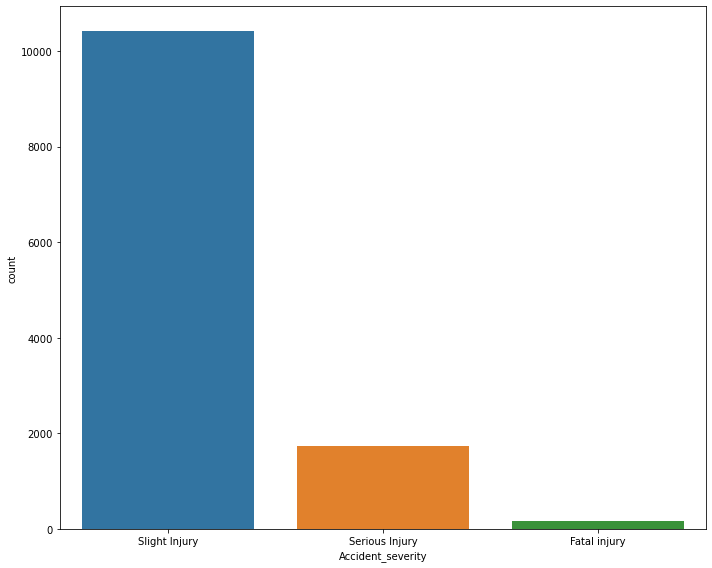

In [19]:
sns.countplot(x=df['Accident_severity'], data=df)
plt.show()

**Segment and group by the target feature**

In [20]:
# What day usually the accident happens?
# Accident severity and day of the week 

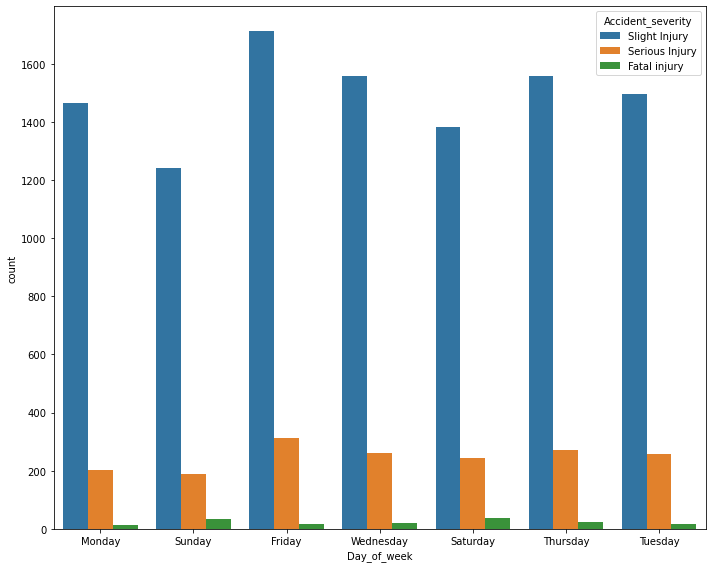

In [21]:
sns.countplot(data=df, x='Day_of_week', hue='Accident_severity')
plt.show()

In [22]:
grouped_data = df.groupby(['Day_of_week', 'Accident_severity']).size()
grouped_data

Day_of_week  Accident_severity
Friday       Fatal injury           16
             Serious Injury        313
             Slight Injury        1712
Monday       Fatal injury           12
             Serious Injury        204
             Slight Injury        1465
Saturday     Fatal injury           37
             Serious Injury        245
             Slight Injury        1384
Sunday       Fatal injury           35
             Serious Injury        190
             Slight Injury        1242
Thursday     Fatal injury           22
             Serious Injury        272
             Slight Injury        1557
Tuesday      Fatal injury           17
             Serious Injury        257
             Slight Injury        1496
Wednesday    Fatal injury           19
             Serious Injury        262
             Slight Injury        1559
dtype: int64

In [23]:
data_to_plot = grouped_data.unstack()
data_to_plot

Accident_severity,Fatal injury,Serious Injury,Slight Injury
Day_of_week,,,
Friday,16,313,1712
Monday,12,204,1465
Saturday,37,245,1384
Sunday,35,190,1242
Thursday,22,272,1557
Tuesday,17,257,1496
Wednesday,19,262,1559


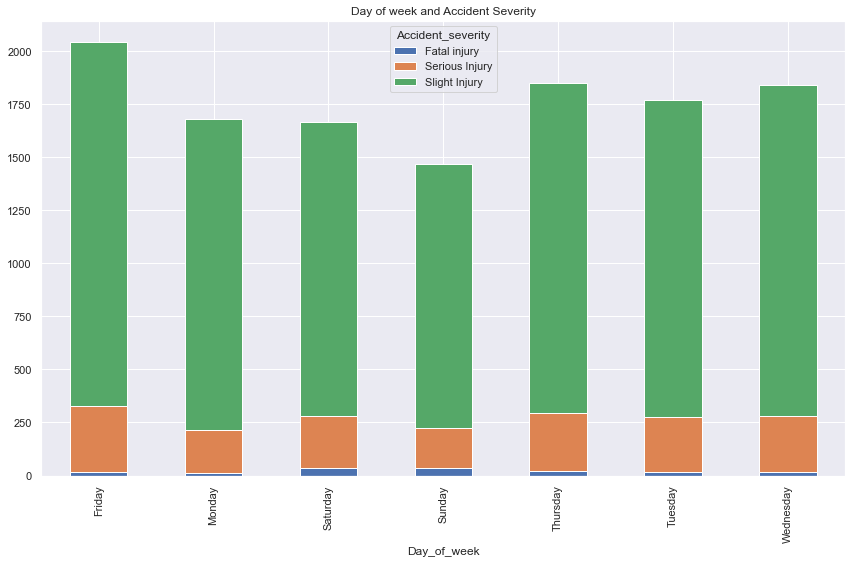

In [24]:
sns.set()
data_to_plot.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Day of week and Accident Severity')
plt.show()

In [25]:
df_new = pd.DataFrame()
df_new['Total_Accident']= df.groupby('Day_of_week')['Accident_severity'].size()
df_new=df_new.sort_values(by='Total_Accident',ascending=False)
df_new

,Total_Accident
Day_of_week,
Friday,2041
Thursday,1851
Wednesday,1840
Tuesday,1770
Monday,1681
Saturday,1666
Sunday,1467


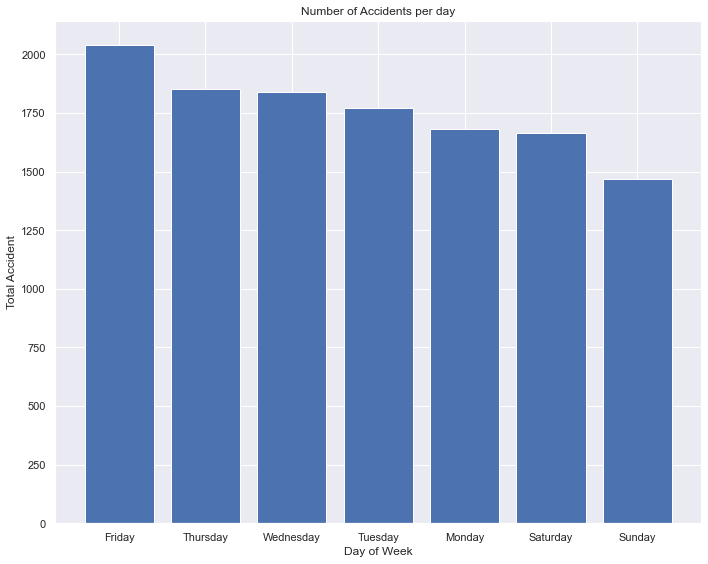

In [26]:
plt.bar(x=df_new.index, height=df_new.Total_Accident)
plt.xlabel('Day of Week')
plt.ylabel('Total Accident')
plt.title('Number of Accidents per day')
plt.show()

Most of the accidents occur every Friday

In [27]:
# Who are the common casualty class and its accident severity?
# Accident severity and Casualty_class

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


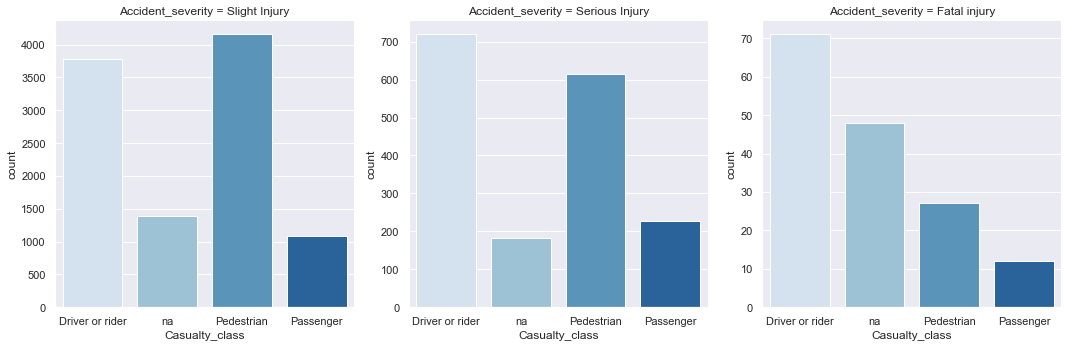

In [28]:
grid = sns.FacetGrid(data=df, col='Accident_severity', height=5, aspect=1, sharey=False)
grid.map(sns.countplot, 'Casualty_class', palette='Blues')
plt.show()

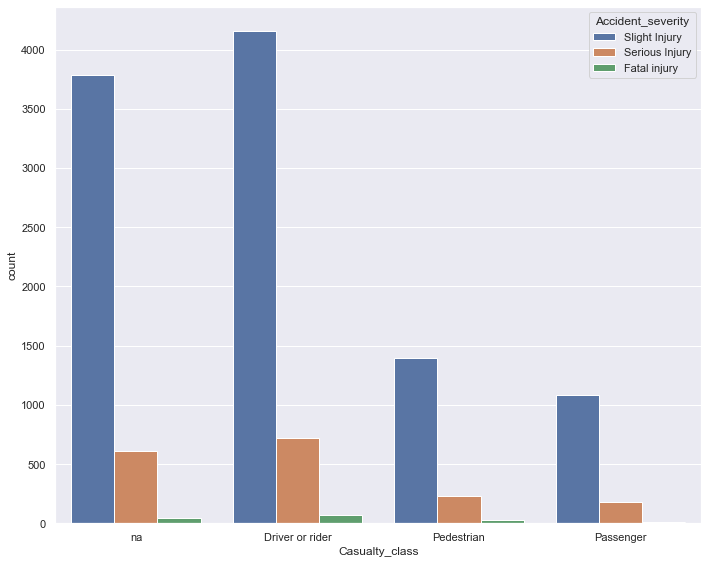

In [29]:
sns.countplot(data=df, x='Casualty_class', hue='Accident_severity')
plt.show()

The driver of the vehicle is the most affected and casualty of the recorded accidents

In [30]:
#What age range of the 
#Age_band_of_driver and Accident Severity

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


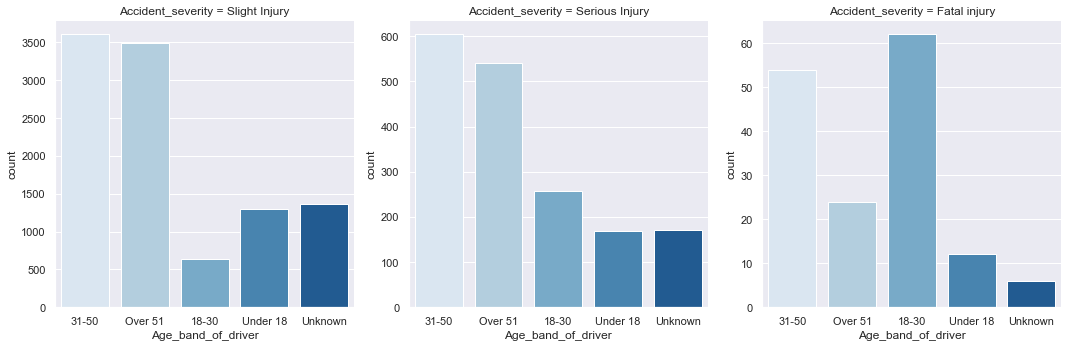

In [31]:
grid = sns.FacetGrid(data=df, col='Accident_severity', height=5, aspect=1, sharey=False)
grid.map(sns.countplot, 'Age_band_of_driver', palette='Blues')
plt.show()

* Drivers that have an age between 31 to 50, the severity of their accident are slight and serious injury.
* But drivers that have an age between 18 to 30, their accident severity is fatal injury.

In [32]:
#How many vehicles involved in an accident and its severity
#Number_of_vehicles_involved and Accident_severity

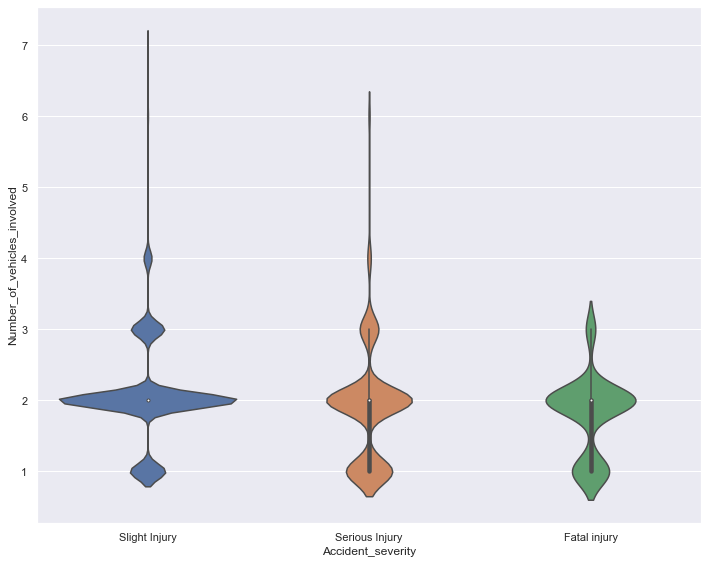

In [33]:
sns.violinplot(data=df, y='Number_of_vehicles_involved', x='Accident_severity')
plt.show()

* Most of the accidents have 2 vehicles involved

In [34]:
# When do the accident happens?
# Time vs Accident_severity

In [35]:
df['Day'] = pd.cut(pd.to_datetime(df.Time).dt.hour,
       bins=[0, 6, 12, 18, 24],
       labels=['Dawn', 'morning', 'afternoon', 'evening'],
       right=False,
       include_lowest=True)

df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Day
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,afternoon
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,afternoon
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,afternoon
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,Dawn
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,Dawn


In [36]:
df.drop(columns='Time', inplace = True)
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,afternoon
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,afternoon
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,afternoon
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,Dawn
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,Dawn


Using the countplot function without specifying `order` is likely to produce an incorrect plot.


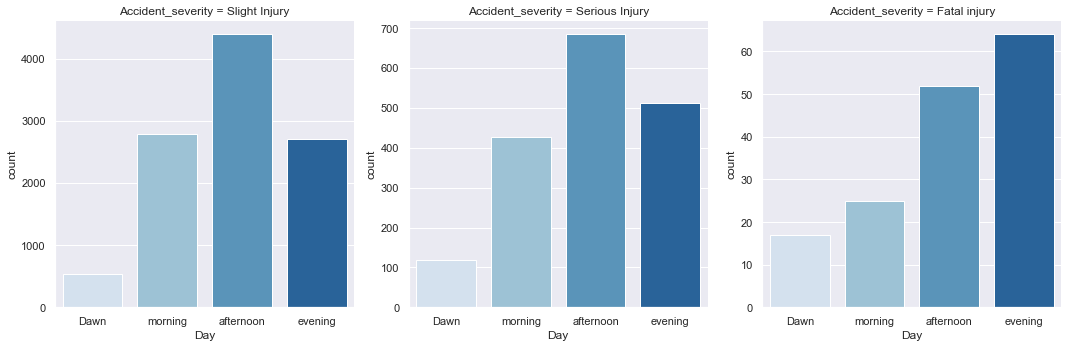

In [37]:
grid = sns.FacetGrid(data=df, col='Accident_severity', height=5, aspect=1, sharey=False)
grid.map(sns.countplot, 'Day', palette='Blues')
plt.show()

In [38]:
df_new = pd.DataFrame()
df_new['Accident_per_day']= df.groupby('Day')['Accident_severity'].size()
df_new=df_new.sort_values(by='Accident_per_day',ascending=False)
df_new

,Accident_per_day
Day,
afternoon,5125
evening,3280
morning,3236
Dawn,675


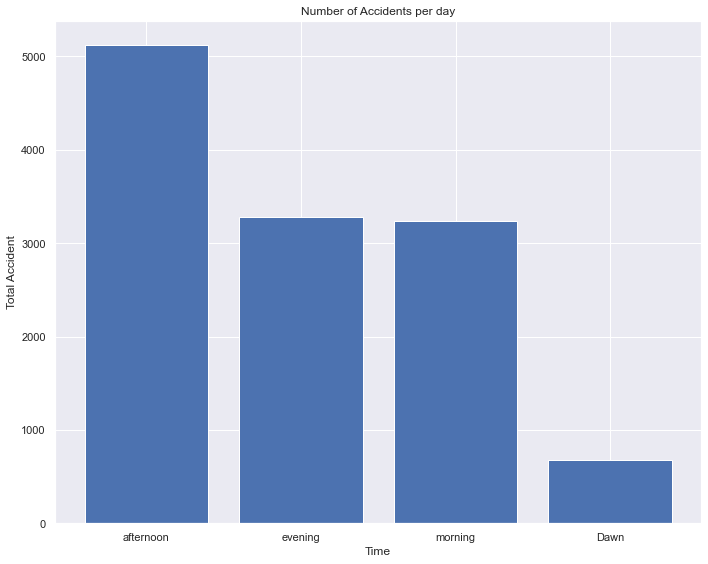

In [39]:
plt.bar(x=df_new.index, height=df_new.Accident_per_day)
plt.xlabel('Time')
plt.ylabel('Total Accident')
plt.title('Number of Accidents per day')
plt.show()

* Most of the accidents occurs during afternoon
* Accident happen during the afternoon had cause slight and serious injuries to the casualties
* Accident happen during the night had cause fatal injuries to the casualties

# Data Preprocessing

In [40]:
# Check the unique values of each column
for col in df:
    print(f'{col}: {df[col].unique()}')
    print('--------------------------')

Day_of_week: ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
--------------------------
Age_band_of_driver: ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
--------------------------
Sex_of_driver: ['Male' 'Female' 'Unknown']
--------------------------
Educational_level: ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
--------------------------
Vehicle_driver_relation: ['Employee' 'Unknown' 'Owner' nan 'Other']
--------------------------
Driving_experience: ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
--------------------------
Type_of_vehicle: ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
--------------------------
Owner_of_vehicle: ['Owner' '

**Missing value treatment**

In [41]:
# check for missing values manually
missingval = df.isnull().sum()
percentage_missing = 100 * df.isnull().sum()/len(df)
missing_table = pd.concat([missingval,percentage_missing],axis=1)
missing_table = missing_table.rename(columns = {0:'MissingValues', 1:'Percentage'})
missing_table.sort_values(by='MissingValues',ascending=False)

,MissingValues,Percentage
Defect_of_vehicle,4427,35.945112
Service_year_of_vehicle,3928,31.893472
Work_of_casuality,3198,25.966223
Fitness_of_casuality,2635,21.394933
Type_of_vehicle,950,7.713543
Types_of_Junction,887,7.202014
Driving_experience,829,6.731082
Educational_level,741,6.016564
Vehicle_driver_relation,579,4.701202
Owner_of_vehicle,482,3.913608


In [42]:
missing_table[missing_table['Percentage'] > 20]

,MissingValues,Percentage
Service_year_of_vehicle,3928,31.893472
Defect_of_vehicle,4427,35.945112
Work_of_casuality,3198,25.966223
Fitness_of_casuality,2635,21.394933


The top columns having multiple null values are: Defect_of_vehicle,Service_year_of_vehicle, Work_of_casuality and Fitness_of_casuality. These columns have more than 20% missing values

<AxesSubplot:>

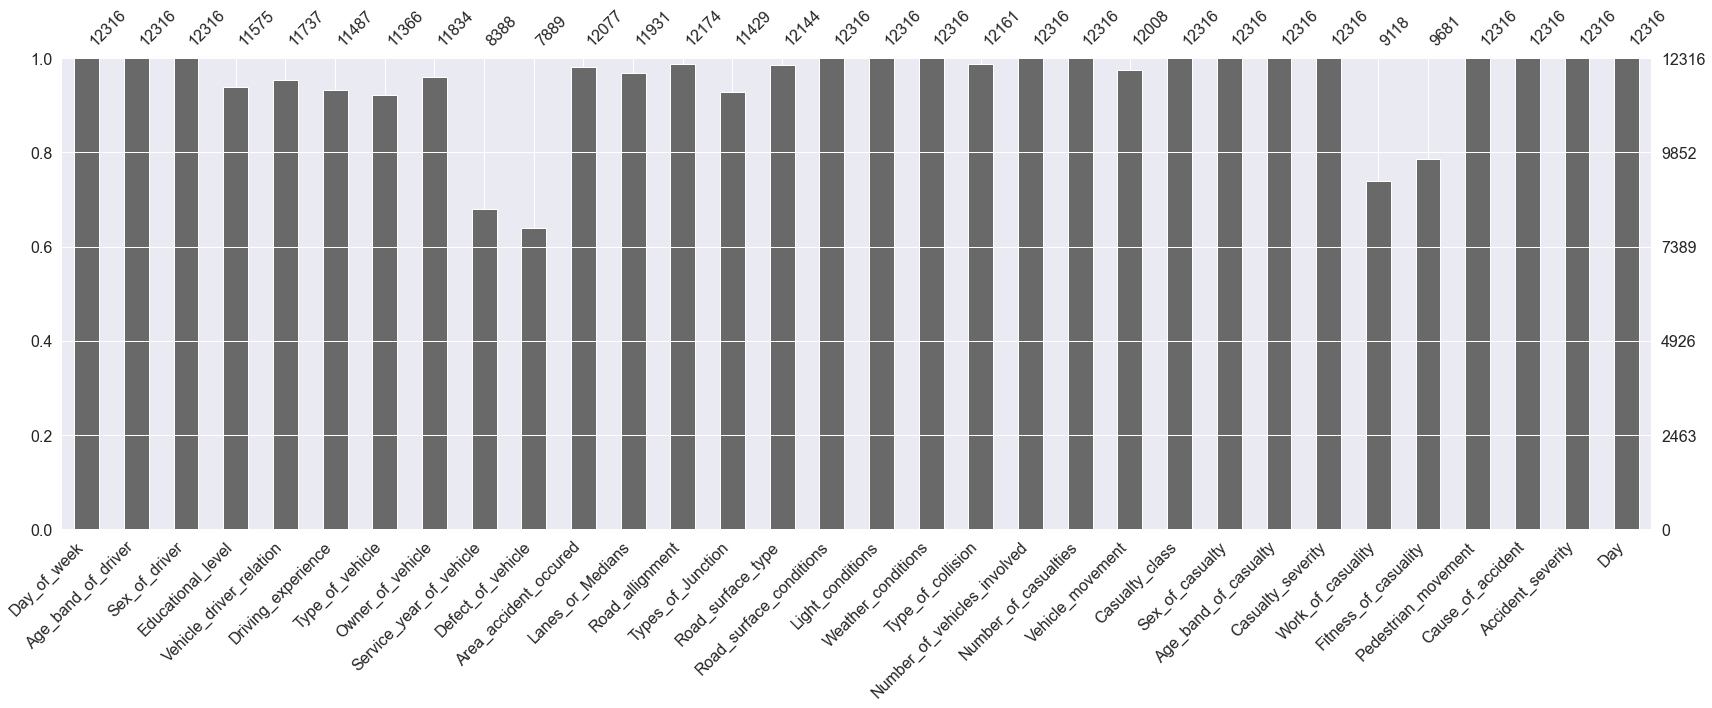

In [43]:
#check for missing values using missingno
msno.bar(df)

Based of the bar chart above, the following columns have a distinct amount missing values: Service_year_of_vehicle, Defect_of_vehicle, Types_of_Junction, Work_of_casualty, Fitness_of_casualty

<AxesSubplot:>

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


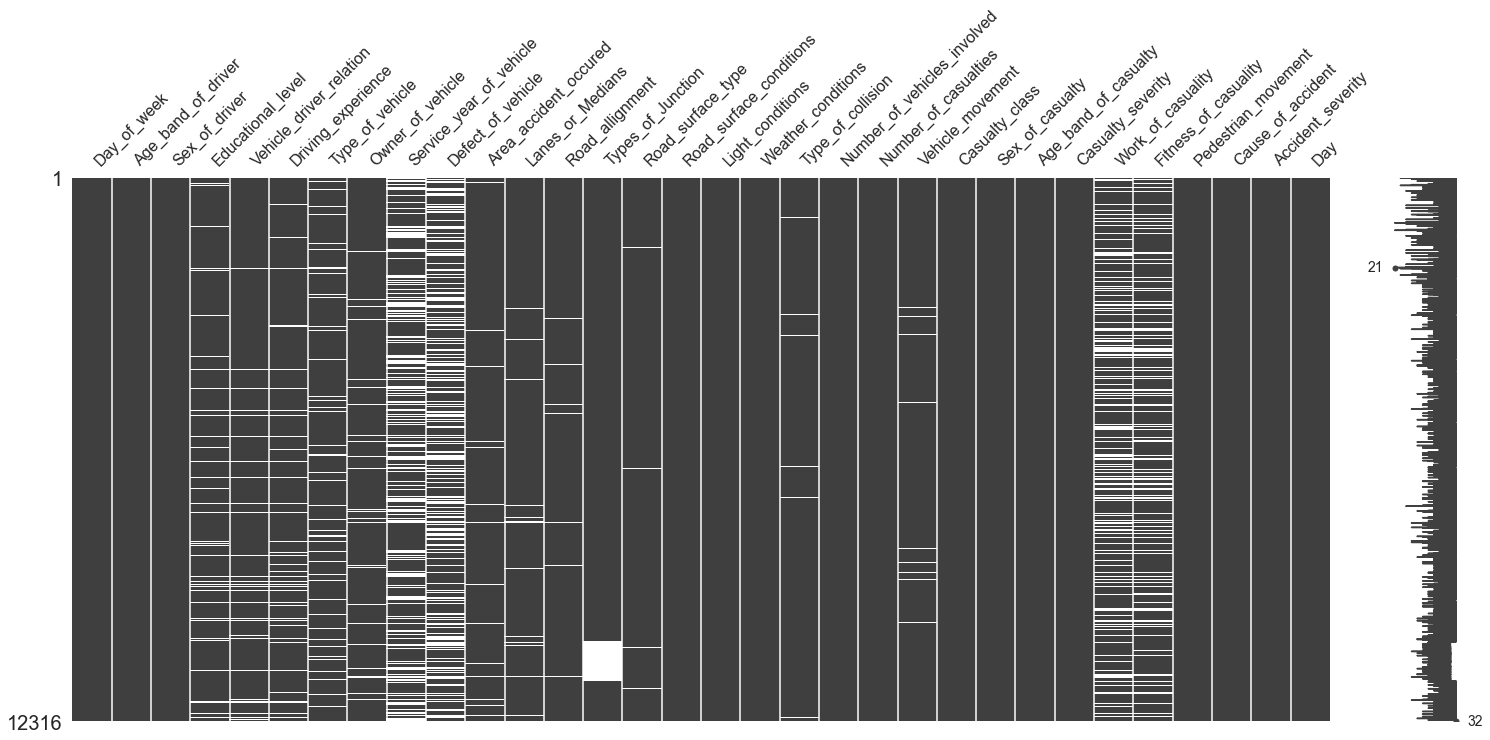

In [44]:
#Visualizing the location of the missing data
msno.matrix(df)

<AxesSubplot:>

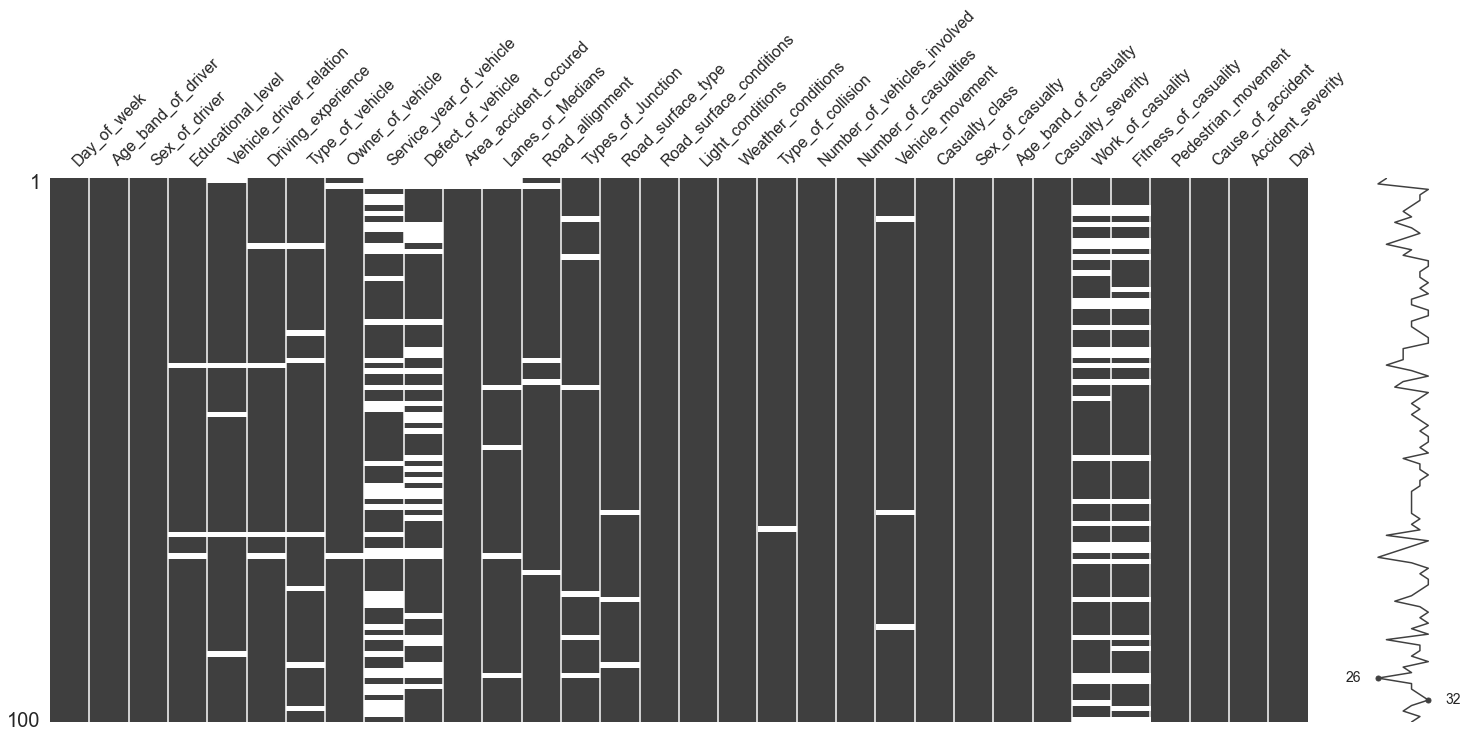

In [45]:
msno.matrix(df.sample(100))

* It can be seen in the graph above that when the work_of_casualty is null, the value of Fitness_of_casualty is also null. Same scenario for Education_level, Vehicle_driver_relation and Driving_experience. These columns might be related with one another.
* By displaying 100 samples, it can be seen that there are multiple null values present for Service_of_year_of_vehicle and Defect_of_vehicle

<AxesSubplot:>

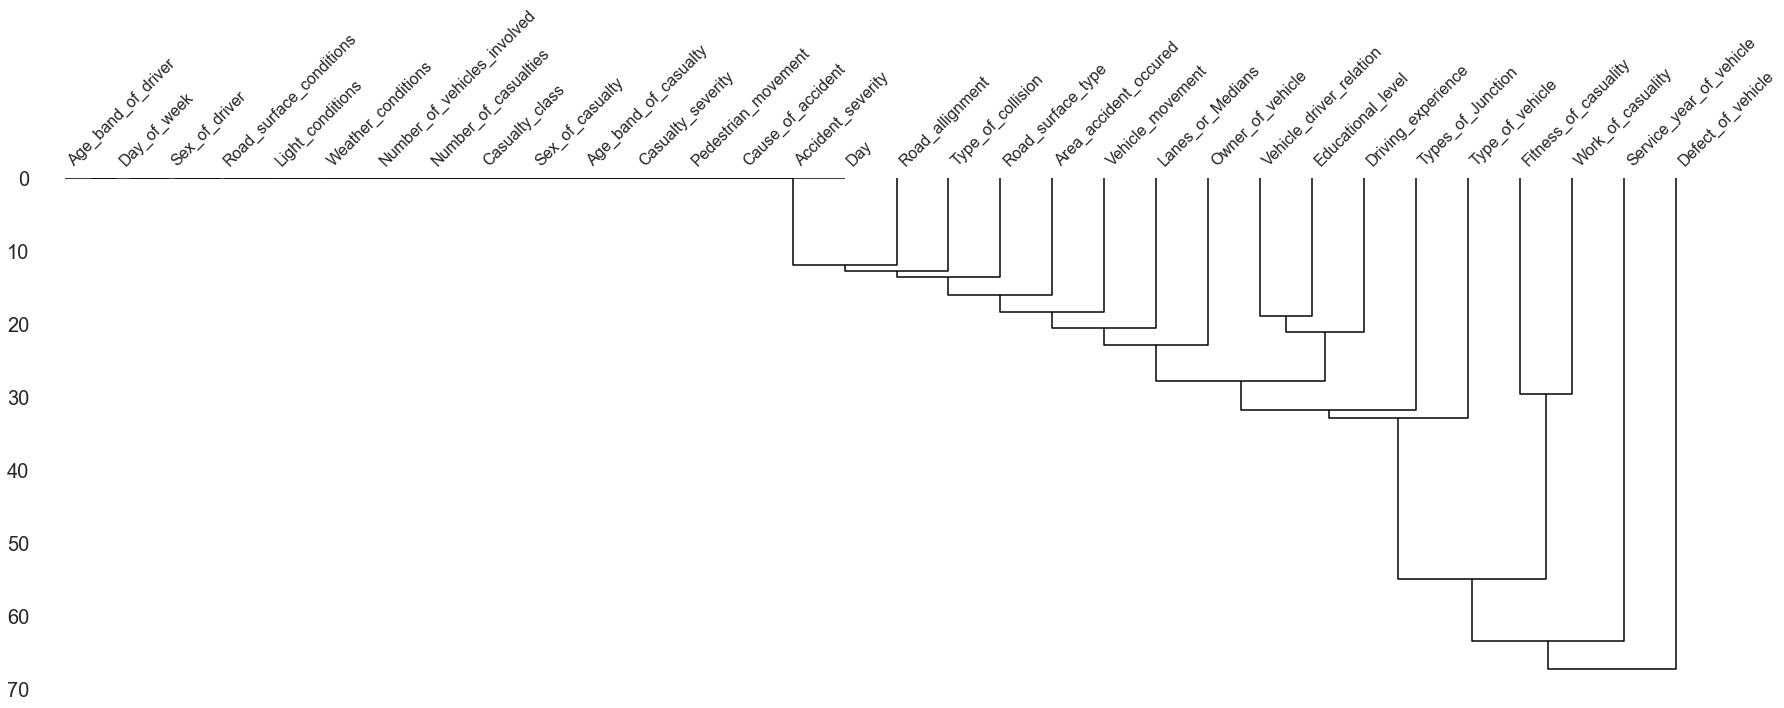

In [46]:
msno.dendrogram(df)

By using dendogram, we can observed the relationship between the columns. It can be seen that Fitness_of_casualty and Work_of_Casualty are highly correlated with one another. So the missing values of these columns can be NMAR

In [47]:
# Convert "na" and 'Unkwnown' values to NaN 
df = df.replace('na',np.nan)
df = df.replace('Unknown',np.nan)
df = df.replace('unknown',np.nan)
df = df.replace('Unknown or other',np.nan)

for col in df:
    print(f'{col}: {df[col].unique()}')
    print('--------------------------')

Day_of_week: ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
--------------------------
Age_band_of_driver: ['18-30' '31-50' 'Under 18' 'Over 51' nan]
--------------------------
Sex_of_driver: ['Male' 'Female' nan]
--------------------------
Educational_level: ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
--------------------------
Vehicle_driver_relation: ['Employee' nan 'Owner' 'Other']
--------------------------
Driving_experience: ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr']
--------------------------
Type_of_vehicle: ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
--------------------------
Owner_of_vehicle: ['Owner' 'Governmental' nan 'Organization' 'Other']
-

In [48]:
# Treating missing values 
"""
Since most of the features are categorical, we will be using 
the most frequent values within that particular columns to fill in 
missing values

By this way we can prevent losing important data
"""

from sklearn.impute import SimpleImputer
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = mean_imputer.fit_transform(df)

df.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_s

**Bin/Group Similar Values**

In [49]:
df.columns.values

array(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation',
       'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle',
       'Service_year_of_vehicle', 'Defect_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity', 'Day'], dtype=object)

In [50]:
df.loc[df['Cause_of_accident'].str.contains('Changing lane'), 'Cause_of_accident'] = 'Changing_lane'
df['Cause_of_accident'].unique()

array(['Moving Backward', 'Overtaking', 'Changing_lane', 'Overloading',
       'Other', 'No priority to vehicle', 'No priority to pedestrian',
       'No distancing', 'Getting off the vehicle improperly',
       'Improper parking', 'Overspeed', 'Driving carelessly',
       'Driving at high speed', 'Driving to the left', 'Overturning',
       'Turnover', 'Driving under the influence of drugs',
       'Drunk driving'], dtype=object)

In [51]:
df.loc[df['Pedestrian_movement'].str.contains('Crossing from'), 'Pedestrian_movement'] = 'Crossing'
df.loc[df['Pedestrian_movement'].str.contains('Walking along'), 'Pedestrian_movement'] = 'Walking'
df.loc[df['Pedestrian_movement'].str.contains('- not crossing'), 'Pedestrian_movement'] = 'Not_Crossing'
df['Pedestrian_movement'].unique()

array(['Not a Pedestrian', 'Crossing', 'Not_Crossing', 'Walking'],
      dtype=object)

In [52]:
df['Type_of_collision'].replace('Vehicle with vehicle collision','Vehicle_to_vehicle', inplace = True)
df['Type_of_collision'].replace('Collision with roadside-parked vehicles','Collision with roadside objects', inplace = True)
df['Type_of_collision'].unique()

array(['Collision with roadside objects', 'Vehicle_to_vehicle',
       'Collision with animals', 'Other', 'Rollover',
       'Fall from vehicles', 'Collision with pedestrians', 'With Train'],
      dtype=object)

In [53]:
df['Fitness_of_casuality'].replace('NormalNormal','Normal', inplace = True)
df['Fitness_of_casuality'].unique()

array(['Normal', 'Deaf', 'Other', 'Blind'], dtype=object)

In [54]:
df['Age_band_of_casualty'].replace('5','Under 18', inplace = True)
df['Age_band_of_casualty'].unique()

array(['18-30', '31-50', 'Under 18', 'Over 51'], dtype=object)

In [55]:
df.loc[df['Weather_conditions'].str.contains('Raining'), 'Weather_conditions'] = 'Raining'
df.loc[df['Weather_conditions'].str.contains('Fog'), 'Weather_conditions'] = 'Fog'
df['Weather_conditions'].unique()

array(['Normal', 'Raining', 'Cloudy', 'Other', 'Windy', 'Snow', 'Fog'],
      dtype=object)

In [56]:
df.loc[df['Light_conditions'].str.contains('Darkness'), 'Light_conditions'] = 'Darkness'
df['Light_conditions'].unique()

array(['Daylight', 'Darkness'], dtype=object)

In [57]:
df.loc[df['Road_surface_type'].str.contains('Asphalt roads'), 'Road_surface_type'] = 'Alphalt_roads'
df['Road_surface_type'].unique()

array(['Alphalt_roads', 'Earth roads', 'Gravel roads', 'Other'],
      dtype=object)

In [58]:
df.loc[df['Road_allignment'].str.contains('Tangent road'), 'Road_allignment'] = 'Tangent_road'
df.loc[df['Road_allignment'].str.contains('Steep grade'), 'Road_allignment'] = 'Steep_grade'
df['Road_allignment'].unique()

array(['Tangent_road', 'Escarpments', 'Gentle horizontal curve',
       'Steep_grade', 'Sharp reverse curve'], dtype=object)

In [59]:
df.loc[df['Lanes_or_Medians'].str.contains('Two-way'), 'Lanes_or_Medians'] = 'Two_way'
df.loc[df['Lanes_or_Medians'].str.contains('Two way'), 'Lanes_or_Medians'] = 'Two_way'
df.loc[df['Lanes_or_Medians'].str.contains('Double carriageway'), 'Lanes_or_Medians'] = 'Double_carriageway'
df['Lanes_or_Medians'].unique() #Combine twoway

array(['Two_way', 'other', 'Double_carriageway', 'One way'], dtype=object)

In [60]:
df.loc[df['Type_of_vehicle'].str.contains('Public'), 'Type_of_vehicle'] = 'Public'
df.loc[df['Type_of_vehicle'].str.contains('Lorry'), 'Type_of_vehicle'] = 'Lorry'
df.loc[df['Type_of_vehicle'].str.contains('lorry'), 'Type_of_vehicle'] = 'Lorry'
df['Type_of_vehicle'].unique() #Public, Lorry, 

array(['Automobile', 'Public', 'Lorry', 'Taxi', 'Pick up upto 10Q',
       'Stationwagen', 'Ridden horse', 'Other', 'Bajaj', 'Turbo',
       'Motorcycle', 'Special vehicle', 'Bicycle'], dtype=object)

In [61]:
df.loc[df['Area_accident_occured'].str.contains('Rural village areasOffice areas'), 'Area_accident_occured'] = 'Office_areas'
df['Area_accident_occured'].unique()

array(['Residential areas', 'Office areas', '  Recreational areas',
       ' Industrial areas', 'Other', ' Church areas', '  Market areas',
       'Rural village areas', ' Outside rural areas', ' Hospital areas',
       'School areas', 'Office_areas', 'Recreational areas'], dtype=object)

**Replace whitespaces into underscores**

In [62]:
df.replace(' ', '_', regex=True, inplace=True)

In [63]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Day
0,Monday,18-30,Male,Above_high_school,Employee,1-2yr,Automobile,Owner,Above_10yr,No_defect,...,Driver_or_rider,Male,18-30,3,Driver,Normal,Not_a_Pedestrian,Moving_Backward,Slight_Injury,afternoon
1,Monday,31-50,Male,Junior_high_school,Employee,Above_10yr,Public,Owner,5-10yrs,No_defect,...,Driver_or_rider,Male,18-30,3,Driver,Normal,Not_a_Pedestrian,Overtaking,Slight_Injury,afternoon
2,Monday,18-30,Male,Junior_high_school,Employee,1-2yr,Lorry,Owner,2-5yrs,No_defect,...,Driver_or_rider,Male,31-50,3,Driver,Normal,Not_a_Pedestrian,Changing_lane,Serious_Injury,afternoon
3,Sunday,18-30,Male,Junior_high_school,Employee,5-10yr,Public,Governmental,2-5yrs,No_defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not_a_Pedestrian,Changing_lane,Slight_Injury,Dawn
4,Sunday,18-30,Male,Junior_high_school,Employee,2-5yr,Automobile,Owner,5-10yrs,No_defect,...,Driver_or_rider,Male,18-30,3,Driver,Normal,Not_a_Pedestrian,Overtaking,Slight_Injury,Dawn


**Encoding Categorical to Numerical Values**

In [64]:
df_copy = df.copy()

In [65]:
col = df.dtypes.loc[df.dtypes=='object'].index

for i in col:
    df_copy[i+'_enc'] = LabelEncoder().fit_transform(df_copy[i])
    df_copy.drop(columns=i, inplace=True)
df_copy.head()

,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_enc,Age_band_of_driver_enc,Sex_of_driver_enc,Educational_level_enc,Vehicle_driver_relation_enc,Driving_experience_enc,Type_of_vehicle_enc,Owner_of_vehicle_enc,...,Casualty_class_enc,Sex_of_casualty_enc,Age_band_of_casualty_enc,Casualty_severity_enc,Work_of_casuality_enc,Fitness_of_casuality_enc,Pedestrian_movement_enc,Cause_of_accident_enc,Accident_severity_enc,Day_enc
0,2,2,1,0,1,0,0,0,0,3,...,0,1,0,2,0,2,2,8,2,1
1,2,2,1,1,1,4,0,3,7,3,...,0,1,0,2,0,2,2,15,2,1
2,2,2,1,0,1,4,0,0,3,3,...,0,1,1,2,0,2,2,0,1,1
3,2,2,3,0,1,4,0,2,7,0,...,2,0,0,2,0,2,2,0,2,0
4,2,2,3,0,1,4,0,1,0,3,...,0,1,0,2,0,2,2,15,2,0


# Feature Engineering

In [66]:
df_copy.columns

Index(['Number_of_vehicles_involved', 'Number_of_casualties',
       'Day_of_week_enc', 'Age_band_of_driver_enc', 'Sex_of_driver_enc',
       'Educational_level_enc', 'Vehicle_driver_relation_enc',
       'Driving_experience_enc', 'Type_of_vehicle_enc', 'Owner_of_vehicle_enc',
       'Service_year_of_vehicle_enc', 'Defect_of_vehicle_enc',
       'Area_accident_occured_enc', 'Lanes_or_Medians_enc',
       'Road_allignment_enc', 'Types_of_Junction_enc', 'Road_surface_type_enc',
       'Road_surface_conditions_enc', 'Light_conditions_enc',
       'Weather_conditions_enc', 'Type_of_collision_enc',
       'Vehicle_movement_enc', 'Casualty_class_enc', 'Sex_of_casualty_enc',
       'Age_band_of_casualty_enc', 'Casualty_severity_enc',
       'Work_of_casuality_enc', 'Fitness_of_casuality_enc',
       'Pedestrian_movement_enc', 'Cause_of_accident_enc',
       'Accident_severity_enc', 'Day_enc'],
      dtype='object')

In [67]:
#To drop imbalanced columns
df_copy = df_copy.drop(columns=['Defect_of_vehicle_enc', 'Vehicle_driver_relation_enc', 'Work_of_casuality_enc', 'Fitness_of_casuality_enc'])
df_copy

,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_enc,Age_band_of_driver_enc,Sex_of_driver_enc,Educational_level_enc,Driving_experience_enc,Type_of_vehicle_enc,Owner_of_vehicle_enc,Service_year_of_vehicle_enc,...,Type_of_collision_enc,Vehicle_movement_enc,Casualty_class_enc,Sex_of_casualty_enc,Age_band_of_casualty_enc,Casualty_severity_enc,Pedestrian_movement_enc,Cause_of_accident_enc,Accident_severity_enc,Day_enc
0,2,2,1,0,1,0,0,0,3,3,...,2,2,0,1,0,2,2,8,2,1
1,2,2,1,1,1,4,3,7,3,2,...,6,2,0,1,0,2,2,15,2,1
2,2,2,1,0,1,4,0,3,3,1,...,2,2,0,1,1,2,2,0,1,1
3,2,2,3,0,1,4,2,7,0,1,...,6,2,2,0,0,2,2,0,2,0
4,2,2,3,0,1,4,1,0,3,2,...,6,2,0,1,0,2,2,15,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2,1,6,1,1,4,1,3,3,1,...,6,2,0,1,0,2,2,9,2,1
12312,2,1,3,0,1,1,2,0,3,1,...,6,4,0,1,0,2,2,9,2,2
12313,1,1,3,2,1,4,2,1,3,1,...,6,4,0,1,1,2,2,0,1,1
12314,2,1,3,0,0,4,3,3,3,1,...,6,4,0,1,0,2,2,4,2,1


**Split Dataset to X and y data**

In [68]:
X = df_copy.drop(columns = 'Accident_severity_enc')
y = df_copy['Accident_severity_enc']

In [69]:
print("Training data size:", X.shape)
print("Testing data size:", y.shape)

Training data size: (12316, 27)
Testing data size: (12316,)


In [70]:
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (8621, 27)
Shape of testing feature: (3695, 27)
Shape of training label: (8621,)
Shape of training label: (3695,)


**Imbalanced Data Treatment**

Class=2, n=7324 (84.955%)
Class=1, n=1191 (13.815%)
Class=0, n=106 (1.230%)


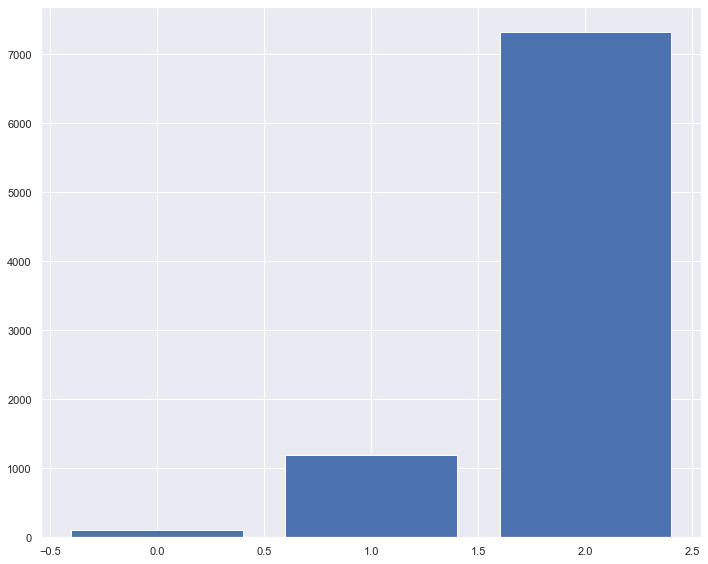

In [72]:
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [73]:
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train,y_train)

Class=2, n=7324 (33.333%)
Class=1, n=7324 (33.333%)
Class=0, n=7324 (33.333%)


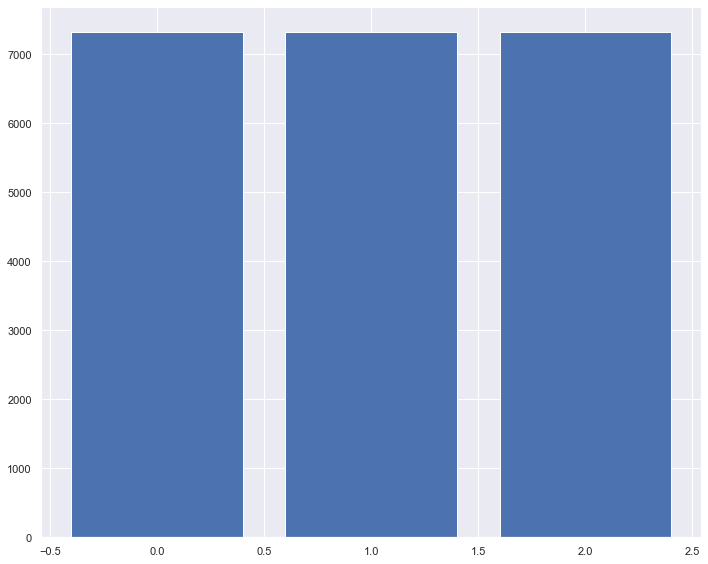

In [74]:
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

# Feature Selection, Model Training and Evaluation

In [75]:
def evaluate_model(model, X_test, y_test):

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Display the model's matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    report = metrics.classification_report(y_test, y_pred, digits=3)

    return {'cm':cm, 'report':report}

In [76]:
# Models to be used: LogisticRegression, DecisionTree, RandomForest, NaiveBayes,KNN

# Decision Tree model 
dt = DecisionTreeClassifier(random_state=0)
#dtc.fit(X_train, y_train)
# Logistic Regression model
ex = ExtraTreesClassifier()
# Random Forest model
rf = RandomForestClassifier(n_estimators=200)
# Naive Bayes model 
nb = GaussianNB()
# KNN model 
xgb = XGBClassifier()

model = {'DecisionTree':dt, 'ExtraTree':ex, 'RandomForest': rf, 'NaiveBayes': nb, 'XGboost':xgb}

In [77]:
def fit_model(model, X_train, y_train):
    model.fit(X_train, y_train)

In [78]:
for model_key, model_values in model.items():
    print('------------')
    print('Model: ',model_key)
    
    #X_train_fs, X_test_fs = select_features_RFE(X_train, y_train, X_test)
    fit_model(model_values,X_train,y_train)
    mod = evaluate_model(model_values, X_test, y_test)
    # Print result
    print('Confusion Matrix:\n', mod['cm'])
    print('Report:\n', mod['report'])

------------
Model:  DecisionTree
Confusion Matrix:
 [[  15   14   23]
 [  13  174  365]
 [  94  693 2304]]
Report:
               precision    recall  f1-score   support

           0      0.123     0.288     0.172        52
           1      0.198     0.315     0.243       552
           2      0.856     0.745     0.797      3091

    accuracy                          0.675      3695
   macro avg      0.392     0.450     0.404      3695
weighted avg      0.747     0.675     0.705      3695

------------
Model:  ExtraTree
Confusion Matrix:
 [[   3    8   41]
 [   1   71  480]
 [   3  214 2874]]
Report:
               precision    recall  f1-score   support

           0      0.429     0.058     0.102        52
           1      0.242     0.129     0.168       552
           2      0.847     0.930     0.886      3091

    accuracy                          0.798      3695
   macro avg      0.506     0.372     0.385      3695
weighted avg      0.750     0.798     0.768      3695

-------

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


Confusion Matrix:
 [[   3   10   39]
 [   6   96  450]
 [  24  342 2725]]
Report:
               precision    recall  f1-score   support

           0      0.091     0.058     0.071        52
           1      0.214     0.174     0.192       552
           2      0.848     0.882     0.864      3091

    accuracy                          0.764      3695
   macro avg      0.384     0.371     0.376      3695
weighted avg      0.743     0.764     0.753      3695



Based on the result above, let's compare Random Forest and ExtraTrees

In [79]:
df_importance = pd.DataFrame()
df_importance['Features'] = X.columns
df_importance['Importance'] = rf.feature_importances_
#plt.figure(figsize=(10, 12))
#sns.barplot(data = df_importance.sort_values("Importance", ascending=False), y='Features', x='Importance');
top10 = list(df_importance.sort_values("Importance", ascending=False)['Features'].head(10).values)
top10

['Cause_of_accident_enc',
 'Day_of_week_enc',
 'Type_of_vehicle_enc',
 'Day_enc',
 'Area_accident_occured_enc',
 'Number_of_vehicles_involved',
 'Driving_experience_enc',
 'Number_of_casualties',
 'Types_of_Junction_enc',
 'Light_conditions_enc']

In [80]:
df_importance = pd.DataFrame()
df_importance['Features'] = X.columns
df_importance['Importance'] = ex.feature_importances_
#plt.figure(figsize=(10, 12))
#sns.barplot(data = df_importance.sort_values("Importance", ascending=False), y='Features', x='Importance');
top10 = list(df_importance.sort_values("Importance", ascending=False)['Features'].head(10).values)
top10

['Day_of_week_enc',
 'Cause_of_accident_enc',
 'Number_of_vehicles_involved',
 'Day_enc',
 'Driving_experience_enc',
 'Number_of_casualties',
 'Type_of_vehicle_enc',
 'Light_conditions_enc',
 'Area_accident_occured_enc',
 'Types_of_Junction_enc']

In [81]:
df_top10= df_copy[top10]

Both Random Forest and ExtraTreesClassifier has the same top 10 features

In [82]:
top10_tocsv = [s.replace('_enc', '') for s in top10]
df_top10_to_csv= df[top10_tocsv]
df_top10_to_csv.to_csv('C:/Users/Rocelle Nathalie Ong/Documents/MegaGuidedProjects/RTA Project/Dataset/top_10_features.csv')

In [83]:
#Split the dataset using only the top 10 features
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_top10, y, test_size=0.3, random_state=100, shuffle=True)
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

(8621, 10) (3695, 10) (8621,) (3695,)


In [84]:
baseline_model = [rf, ex]

for i in baseline_model:
    i.fit(X_train_new,y_train_new)
    mod = evaluate_model(i, X_test_new, y_test_new)
    print("Model: ", i)
    print('Confusion Matrix:\n', mod['cm'])
    print('Report:\n', mod['report'])

Model:  RandomForestClassifier(n_estimators=200)
Confusion Matrix:
 [[   2    0   31]
 [   1   39  480]
 [   0   50 3092]]
Report:
               precision    recall  f1-score   support

           0      0.667     0.061     0.111        33
           1      0.438     0.075     0.128       520
           2      0.858     0.984     0.917      3142

    accuracy                          0.848      3695
   macro avg      0.654     0.373     0.385      3695
weighted avg      0.797     0.848     0.799      3695

Model:  ExtraTreesClassifier()
Confusion Matrix:
 [[   5    0   28]
 [   2   55  463]
 [   3   92 3047]]
Report:
               precision    recall  f1-score   support

           0      0.500     0.152     0.233        33
           1      0.374     0.106     0.165       520
           2      0.861     0.970     0.912      3142

    accuracy                          0.841      3695
   macro avg      0.578     0.409     0.437      3695
weighted avg      0.789     0.841     0.801    

The scores of the model had increased when the top 10 important features were used. <br>
We will be using Random Forest as our model

# Hyperparameter Tunning

**1st Attempt**

In [300]:
rf = RandomForestClassifier()
n_estimators = [500,800,1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=5)
grid_search = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_new, y_train_new)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.843058 using {'max_features': 'sqrt', 'n_estimators': 800}
0.842594 (0.004872) with: {'max_features': 'sqrt', 'n_estimators': 500}
0.843058 (0.005554) with: {'max_features': 'sqrt', 'n_estimators': 800}
0.842439 (0.005032) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.842903 (0.005145) with: {'max_features': 'log2', 'n_estimators': 500}
0.842632 (0.005109) with: {'max_features': 'log2', 'n_estimators': 800}
0.842169 (0.005421) with: {'max_features': 'log2', 'n_estimators': 1000}


**2nd Attempt**

In [303]:
rf_2 = RandomForestClassifier(max_features='sqrt', n_estimators= 800)
grid_2 = {'max_depth': [11,15],'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [1,2,5],'n_estimators': [800, 1000]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=5)
grid_search_2 = GridSearchCV(estimator=rf_2, param_grid=grid_2, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_2 = grid_search_2.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result_2.best_score_, grid_result_2.best_params_))
means = grid_result_2.cv_results_['mean_test_score']
stds = grid_result_2.cv_results_['std_test_score']
params = grid_result_2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.848923 using {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
0.000000 (0.000000) with: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 800}
0.000000 (0.000000) with: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 1000}
0.848138 (0.001856) with: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
0.848246 (0.001875) with: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
0.848030 (0.001767) with: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}
0.848165 (0.001737) with: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
0.000000 (0.000000) with: {'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 800}
0.000000 (0.000000) with: {'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators':

In [85]:
rf_tuned = RandomForestClassifier(max_features='sqrt', n_estimators= 800)
rf_tuned_2 = RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=800)

tuned_models = [rf_tuned, rf_tuned_2]

for i in tuned_models:
    i.fit(X_train_new,y_train_new)
    mod = evaluate_model(i,X_test_new,y_test_new)
    print("Model: ",i)
    print('Confusion Matrix:\n', mod['cm'])
    print('Report:\n', mod['report'])

Model:  RandomForestClassifier(max_features='sqrt', n_estimators=800)
Confusion Matrix:
 [[   2    0   31]
 [   1   38  481]
 [   0   44 3098]]
Report:
               precision    recall  f1-score   support

           0      0.667     0.061     0.111        33
           1      0.463     0.073     0.126       520
           2      0.858     0.986     0.918      3142

    accuracy                          0.849      3695
   macro avg      0.663     0.373     0.385      3695
weighted avg      0.801     0.849     0.799      3695

Model:  RandomForestClassifier(max_depth=15, n_estimators=800)
Confusion Matrix:
 [[   1    0   32]
 [   1   28  491]
 [   0   21 3121]]
Report:
               precision    recall  f1-score   support

           0      0.500     0.030     0.057        33
           1      0.571     0.054     0.098       520
           2      0.856     0.993     0.920      3142

    accuracy                          0.853      3695
   macro avg      0.643     0.359     0.358     

In [86]:
# save model
joblib.dump(rf_tuned_2, 'C:/Users/Rocelle Nathalie Ong/Documents/MegaGuidedProjects/RTA Project/Model/rf_tuned_model.joblib')

['C:/Users/Rocelle Nathalie Ong/Documents/MegaGuidedProjects/RTA Project/Model/rf_tuned_model.joblib']

In [87]:
le = LabelEncoder()
joblib.dump(le, 'C:/Users/Rocelle Nathalie Ong/Documents/MegaGuidedProjects/RTA Project/Model/label_encoder.joblib')

['C:/Users/Rocelle Nathalie Ong/Documents/MegaGuidedProjects/RTA Project/Model/label_encoder.joblib']

# Explainable AI

In [311]:
shap.initjs()

In [316]:
X_sample = X_train_new.sample(100)
X_sample

,Day_of_week_enc,Cause_of_accident_enc,Number_of_vehicles_involved,Day_enc,Number_of_casualties,Driving_experience_enc,Type_of_vehicle_enc,Light_conditions_enc,Types_of_Junction_enc,Area_accident_occured_enc
6303,3,9,2,2,1,1,0,1,6,1
313,2,2,3,1,2,1,4,1,0,0
2829,2,10,3,3,1,2,6,1,0,1
3384,6,9,2,3,1,2,0,1,0,6
4352,6,10,2,2,1,3,3,1,6,1
...,...,...,...,...,...,...,...,...,...,...
3702,5,2,1,1,1,2,0,1,6,0
1696,4,0,2,3,1,2,0,1,0,6
11340,5,2,1,1,1,1,0,1,6,3
8987,6,6,3,3,4,2,3,1,6,3


In [318]:
shap_values = shap.TreeExplainer(rf_tuned_2).shap_values(X_sample)

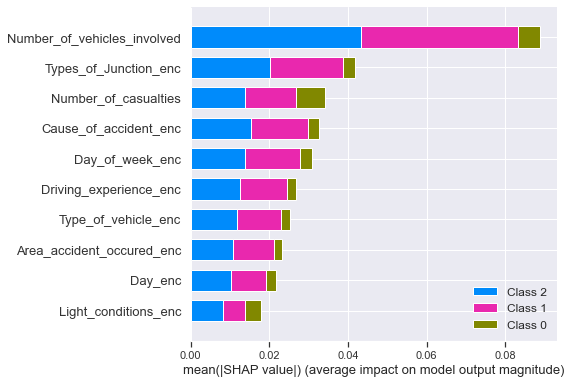

In [319]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

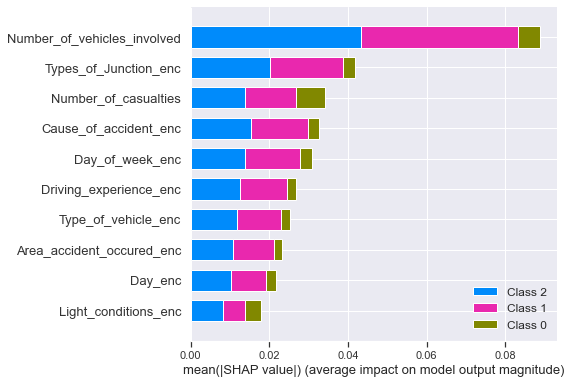

In [320]:
shap.summary_plot(shap_values, X_sample, max_display=28)

In [322]:
shap.force_plot(shap.TreeExplainer(rf_tuned_2).expected_value[0],
                shap_values[0][:], 
                X_sample)

In [323]:
print(y_pred_tuned[50])
shap.force_plot(shap.TreeExplainer(rf_tuned_2).expected_value[0], shap_values[1][50], X_sample.iloc[50])

2


In [324]:
i=13
print(y_pred_tuned[i])
shap.force_plot(shap.TreeExplainer(rf_tuned_2).expected_value[0], shap_values[0][i], X_sample.values[i], feature_names = X_sample.columns)

1


2


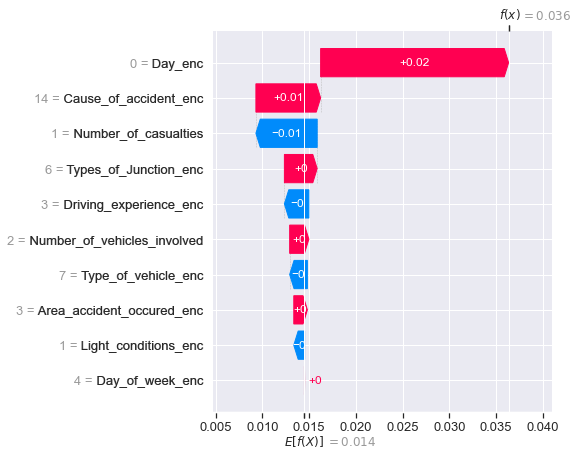

In [325]:
print(y_pred_tuned[10])
row = 10
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=shap.TreeExplainer(rf_tuned_2).expected_value[0], data=X_sample.iloc[row],  
                                         feature_names=X_sample.columns.tolist()))

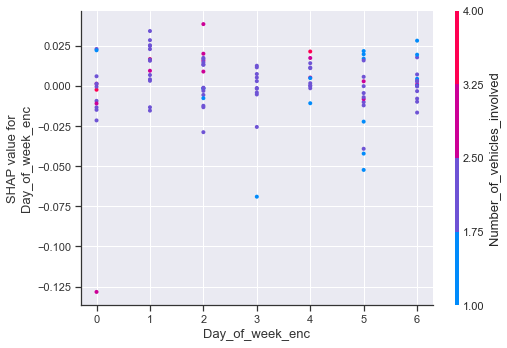

In [326]:
shap.dependence_plot('Day_of_week_enc', shap_values[2], X_sample)

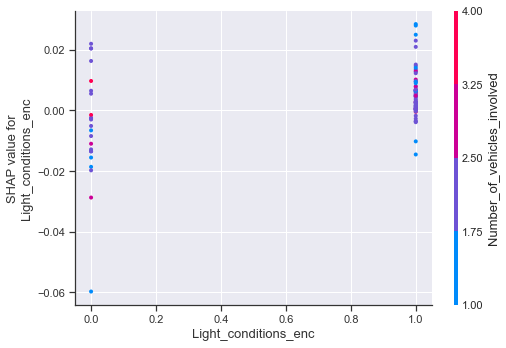

In [327]:
shap.dependence_plot('Light_conditions_enc', shap_values[2], X_sample)

2


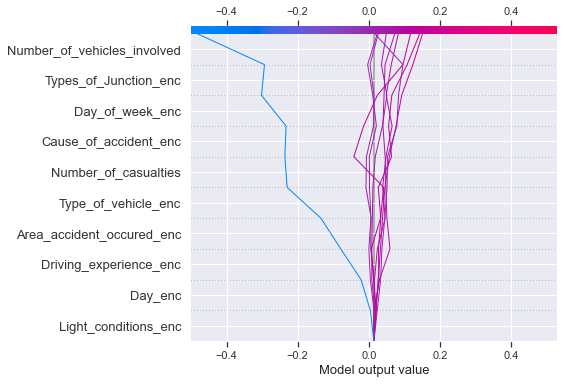

In [328]:
print(y_pred_tuned[10])
shap.decision_plot(shap.TreeExplainer(rf_tuned_2).expected_value[0], 
                   shap_values[2][:10], 
                   feature_names=X_sample.columns.tolist())

In [99]:
options_cause_acc = ['Changing lane', 'Driving at high speed', 'Driving carelessly', 'Driving to the left', 'Driving under the influence of drugs', 'Drunk driving', 'Getting off the vehicle improperly', 'Improper parking', 'Moving Backward', 'No distancing', 'No priority to pedestrian', 'No priority to vehicle', 'Other', 'Overloading', 'Overspeed', 'Overtaking', 'Overturning', 'Turnover']

selected = 'Driving at high speed'

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [101]:
import pandas as pd

In [ ]:
feat_val = list(1+np.arange(len(options_cause_acc)))
feat_key = options_cause_acc
    feat_dict = dict(zip(feat_key, feat_val))
    value = feat_dict[input_val]
    return value

In [102]:
def encode_value(entered_value,options):
    values = list(le.fit_transform(options))
    keys = options
    dictionary = dict(zip(keys, values))
    encoded_value = dictionary[entered_value]
    return encoded_value

In [103]:
print(encode_value(selected,options_cause_acc))

1
